<a href="https://colab.research.google.com/github/DryFrost/MST_PCV/blob/main/PlantCV_Diagnostic_ML_10142020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0 Diagnostic Code Set-Up

###1.1 Connecting to Google Drive

In [ ]:
#This is a push test
import glob
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/')
%cd gdrive/Shared\ drives/Sharing\ Is\ Caring/Images/Colab/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/Shared drives/Sharing Is Caring/Images/Colab/'
/content/gdrive/Shared drives/Sharing Is Caring/Images/Colab


### 1.2 Run library installation at beginning of session.

In [ ]:
!pip install plantcv

###1.3 Calling libraries

In [ ]:
from plantcv import plantcv
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from plantcv import plantcv as pcv
pcv.params.debug = 'plot'


## 2.0 Selecting Image

### 2.1 Selecting Image ID

In [ ]:
desiredID= 3089

In [ ]:
files=[]
id=[]
desiredID=str(desiredID)
for name in glob.glob('*.jpg',recursive=True):
  files.append(name)
  id.append(name.split('_')[0])

imageSet= pd.DataFrame()
imageSet['id'] = [v for v in id]
imageSet['filePath'] = [v for v in files]
selectedImagePath=imageSet.loc[imageSet['id'] == desiredID]
selectedImage=selectedImagePath['filePath'].values
input_image = selectedImage[0]

### 2.2 Looking at image

In [ ]:
img, path, filename = pcv.readimage(input_image)
ts=str(filename.split('_')[7].split('.')[0])
view = filename.split('_')[6]
experiment = filename.split('_')[4]

### 2.3 Enter "Rahel" or "Mariam"

In [ ]:
person = "Rahel"

## 3.0 Adjusting ROI
Change x1, y1, x2, y2 values depending on which camera picture was taken with.

Change values based on cropping issues with image. 

In [ ]:
  if(view=="top"):
        ro=0
        x1_1=835
        y1_1=87
        x2_1=1000
        y2_1=600
      
        m1x_1=0
        m1y_1=0
        m1x_2=0
        m1y_2=0

  if(view=="right"):
        ro=0
        x1_1=995
        y1_1=843
        y2_1=788
        x2_1=589
        
        
        m1x_1=0
        m1y_1=0
        m1x_2=673
        m1y_2=1944

  if(view=="left"):
        ro=0
        x1_1=926
        y1_1=835
        y2_1=900
        x2_1=495
        
        
        m1x_1=1943
        m1y_1=0
        m1x_2=2592
        m1y_2=1944
        
  if(view=="front"):
        ro=270
        x1_1=570
        y1_1=1200
        y2_1=600
        x2_1=450
        
  
        
        m1x_1=862
        m1y_1=1684
        m1x_2=916
        m1y_2=1968
        img = pcv.rotate(img,ro,False)

  if(view=="3d-right"):
        ro=0
        x1_1=1318
        y1_1=770
        x2_1=570
        y2_1=550
    
        
        m1x_1=0
        m1y_1=0
        m1x_2=0
        m1y_2=0

  if(view=="3d-left"):
        ro=0
        x1_1=1318
        y1_1=770
        x2_1=570
        y2_1=550
        
        
        m1x_1=0
        m1y_1=0
        m1x_2=0
        m1y_2=0 

In [ ]:
##### DUMMY CODE FOR ADDING MASK ######

        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[43,73,84], upper_thresh=[68,91,108], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")

In [ ]:
    # if(person=="Rahel"):

    #     if(view=="front" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1470, 1750, 25, 50))
    #     if(view=="front" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1435, 1610, 22, 50))
    #         x1_1=570
    #         y1_1=1200
    #         y2_1=600
    #         x2_1=319
    #     if(view=="front" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1475, 1700, 15, 45))
    #     if(view=="front" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1475, 1635, 15, 45))
    #     if(view=="front" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
    #     if(view=="front" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
    #     if(view=="front" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
        
    #     if(view=="right" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(864, 1400, 60, 30))
    #         x1_1=1186
    #         y1_1=847
    #         y2_1=458
    #         x2_1=589
    #     if(view=="right" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(943, 1363, 60, 30))
    #         x1_1=1446
    #         y1_1=847
    #         y2_1=458
    #         x2_1=589
    #     if(view=="right" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1692, 320, 15, 25))
    #     if(view=="right" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1600, 327, 15, 25))
    #     if(view=="right" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1595, 393, 15, 25))
    #     if(view=="right" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1595, 335, 15, 25))
    #     if(view=="right" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1595, 335, 15, 25))

    #     if(view=="left" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1561, 1278, 68, 30))
    #         x1_1=1045
    #         y1_1=923
    #         y2_1=413
    #         x2_1=616
    #     if(view=="left" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1525, 1290, 69, 33))
    #         x1_1=838
    #         y1_1=926
    #         y2_1=540
    #         x2_1=595
    #     if(view=="left" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(943, 120, 43, 24))
    #     if(view=="left" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(866, 53, 300, 200))
    #     if(view=="left" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
    #     if(view=="left" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
    #     if(view=="left" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))

    #     if(view=="top" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(659, 30, 65, 35))
    #         x1_1=657
    #         y1_1=724
    #         x2_1=400
    #         y2_1=400
    #     if(view=="top" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(1438, 1798, 54, 14))
    #         x1_1=850
    #         y1_1=683
    #         x2_1=400
    #         y2_1=400
    #     if(view=="top" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(839, 1619, 54, 19))
    #     if(view=="top" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(926, 1400, 54, 19))
    #     if(view=="top" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(944, 1418, 54, 19))
    #     if(view=="top" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(868, 1708, 54, 19))
    #     if(view=="top" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(868, 1708, 54, 19))
            
      
    #     if(view=="3d-right" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(948, 1700, 18, 64))
            
    #         x1_1=1627
    #         y1_1=1400
    #         x2_1=350
    #         y2_1=400
    #     if(view=="3d-right" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(2434, 912, 24, 56))
    #         x1_1=1393
    #         y1_1=912
    #         x2_1=400
    #         y2_1=400
    #     if(view=="3d-right" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(719, 874, 20, 20))
    #     if(view=="3d-right" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(864, 943, 20, 20))
    #     if(view=="3d-right" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
    #     if(view=="3d-right" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
    #     if(view=="3d-right" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
        
    #     if(view=="3d-left" and ts=='2'):
    #         img = pcv.white_balance(img, mode='hist', roi=(691, 1643, 20, 64))
    #         x1_1=1389
    #         y1_1=1359
    #         x2_1=350
    #         y2_1=350
    #     if(view=="3d-left" and ts=='3'):
    #         img = pcv.white_balance(img, mode='hist', roi=(2545, 879, 29, 50))     
    #         x1_1=1490
    #         y1_1=893
    #         x2_1=450
    #         y2_1=350
    #     if(view=="3d-left" and ts=='4'):
    #         img = pcv.white_balance(img, mode='hist', roi=(816, 853, 20, 20))
    #     if(view=="3d-left" and ts=='5'):
    #         img = pcv.white_balance(img, mode='hist', roi=(788, 859, 200, 100))
    #     if(view=="3d-left" and ts=='6'):
    #         img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))
    #     if(view=="3d-left" and ts=='7'):
    #         img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))
    #     if(view=="3d-left" and ts=='8'):
    #         img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))    
        

    # if(person=="Mariam"):
    #     if(view=="front"):
    #         img = pcv.white_balance(img, mode='hist', roi=(1816, 795, 70, 70))
    #         m1x_1=0
    #         m1y_1=2592
    #         m1x_2=1810
    #         m1y_2=1600
    #         if(experiment=="AMF"):
    #             m1x_1=0
    #             m1y_1=2592
    #             m1x_2=1810
    #             m1y_2=1575
    #             x1=550
    #             y1=1300
    #             x2=300
    #             y2=300
    #     if(view=="right"):
    #         img = pcv.white_balance(img, mode='hist', roi=(1550, 213, 200, 375))
    #         x1=1093
    #         y1=1230
    #         x2=250
    #         y2=250
    #         m1x_1=0
    #         m1y_1=1500
    #         m1x_2=2592
    #         m1y_2=1994
    #         m2x_1=1986
    #         if(experiment=="AMF"):
    #             x1=1100
    #             y1=920
    #             x2=400
    #             y2=320
    #             m1x_1=0
    #             m1y_1=1485
    #             m1x_2=2592
    #             m1y_2=1994
    #             m2x_1=1986

    #     if(view=="left"):
    #         img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
    #         m1x_1=0
    #         m1y_1=1520
    #         m1x_2=2592
    #         m1y_2=1994
    #         m2x_1=1986
    #         x1=1312
    #         y1=1200
    #         x2=300
    #         y2=300
    #         if(experiment=="AMF"):
    #             x1=1150
    #             y1=863
    #             x2=771
    #             y2=533
    #             m1x_1=0
    #             m1y_1=1643
    #             m1x_2=2592
    #             m1y_2=1994
    #             m2x_1=1986
    #     if(view=="top"):
    #         img = pcv.white_balance(img, mode='hist', roi=(861, 1361, 185, 453))
    #         x1=1117
    #         y1=650
    #         x2=350
    #         y2=200
    #         if(experiment=="AMF"):
    #             x1=1045
    #             y1=800
    #             x2=500
    #             y2=300
    

## 4.0 DAYS 2 - 3

### 4.1 White Balance ROI Days 2 - 3

In [ ]:
    if(person=="Rahel"):

        if(view=="front" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(1470, 1750, 25, 50))
        if(view=="front" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(1435, 1610, 22, 50))
            x1_1=570
            y1_1=1200
            y2_1=600
            x2_1=319

        if(view=="right" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(864, 1400, 60, 30))
            x1_1=1186
            y1_1=847
            y2_1=458
            x2_1=589
        if(view=="right" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(943, 1363, 60, 30))
            x1_1=1446
            y1_1=847
            y2_1=458
            x2_1=589

        if(view=="left" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(1561, 1278, 68, 30))
            x1_1=1045
            y1_1=923
            y2_1=413
            x2_1=616
        if(view=="left" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(1525, 1290, 69, 33))
            x1_1=838
            y1_1=926
            y2_1=540
            x2_1=595


        if(view=="top" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(659, 30, 65, 35))
            x1_1=657
            y1_1=724
            x2_1=400
            y2_1=400
        if(view=="top" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(1438, 1798, 54, 14))
            x1_1=850
            y1_1=683
            x2_1=400
            y2_1=400

      
        if(view=="3d-right" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(948, 1700, 18, 64))
            
            x1_1=1627
            y1_1=1400
            x2_1=350
            y2_1=400
        if(view=="3d-right" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(2434, 912, 24, 56))
            x1_1=1393
            y1_1=912
            x2_1=400
            y2_1=400

        if(view=="3d-left" and ts=='2'):
            img = pcv.white_balance(img, mode='hist', roi=(691, 1643, 20, 64))
            x1_1=1389
            y1_1=1359
            x2_1=350
            y2_1=350
        if(view=="3d-left" and ts=='3'):
            img = pcv.white_balance(img, mode='hist', roi=(2545, 879, 29, 50))     
            x1_1=1490
            y1_1=893
            x2_1=450
            y2_1=350



### 4.2 Adding Color Masks Days 2 - 3 

In [ ]:
    masks = pcv.naive_bayes_classifier(img, pdf_file="naive_bayes_pdfs.txt")
    plant = masks['plant']
    fill_image = pcv.fill_holes(plant)
    s = pcv.rgb2gray_hsv(img,channel='s')
    gray_img = s
    lp_img = pcv.laplace_filter(gray_img=gray_img, ksize=1, scale=1)
    lp_shrp_img = pcv.image_subtract(gray_img1=gray_img, gray_img2=lp_img)
    sbx_img = pcv.sobel_filter(gray_img=gray_img, dx=1, dy=0, ksize=1)
    sby_img = pcv.sobel_filter(gray_img=gray_img, dx=0, dy=1, ksize=1)
    sb_img = pcv.image_add(gray_img1=sbx_img, gray_img2=sby_img)
    mblur_img = pcv.median_blur(gray_img=sb_img, ksize=1)
    mblur_invert_img = pcv.invert(gray_img=mblur_img)
    edge_shrp_img = pcv.image_add(gray_img1=mblur_invert_img, gray_img2=lp_shrp_img)

    
    if(ts=='2' or ts=='3'):
        tr_es_img = pcv.threshold.binary(gray_img=edge_shrp_img, threshold=100,max_value=255, object_type='dark')
    if(ts=='4' or ts=='5' or ts=='6' or ts=='7' or ts=='8'):
        tr_es_img = pcv.threshold.binary(gray_img=edge_shrp_img, threshold=75,max_value=255, object_type='dark')
    tr_es_img = pcv.fill(tr_es_img,size=3)
    altMask = pcv.logical_or(fill_image,tr_es_img)
    FillaltMask = pcv.fill_holes(altMask)
    b = pcv.rgb2gray_lab(rgb_img=img,channel='b')
    threshold_dark = pcv.threshold.triangle(b, 255, 'light', xstep=10)
    FinalMask= pcv.logical_or(threshold_dark,FillaltMask)



################# IMAGING DAYS 2 - 3 #################

    if (ts=='2' or ts=='3'):
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[43,73,84], upper_thresh=[68,91,108], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[14,36,45], upper_thresh=[58,76,85], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[246,229,211], upper_thresh=[250,250,250], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[254,254,254], upper_thresh=[255,255,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[169,187,187], upper_thresh=[255,255,251], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[105,189,208], upper_thresh=[168,231,245], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,148,186], upper_thresh=[22,165,221], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[57,101,105], upper_thresh=[146,148,143], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[156,148,134], upper_thresh=[209,202,192], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[143,180,178], upper_thresh=[244,232,227], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[113,117,113], upper_thresh=[180,172,173], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[146,228,255], upper_thresh=[185,241,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[6,162,239], upper_thresh=[43,176,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[131,156,172], upper_thresh=[162,174,185], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[69,78,89], upper_thresh=[97,103,123], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[209,205,146], upper_thresh=[233,234,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[87,222,255], upper_thresh=[158,235,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[23,171,243], upper_thresh=[64,184,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[221,238,248], upper_thresh=[253,255,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,172,223], upper_thresh=[35,190,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,146,188], upper_thresh=[97,210,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[13,199,216], upper_thresh=[149,230,249], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[82,159,189], upper_thresh=[133,195,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[147,244,255], upper_thresh=[179,255,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[71,195,251], upper_thresh=[177,238,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[71,112,140], upper_thresh=[175,192,219], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            

### 4.3 Final Image

In [ ]:
    roi1,roi_hierarchy = pcv.roi.rectangle(masked,x1_1,y1_1,x2_1,y2_1)
    roi_objects,hierarch3,kept_mask,obj_area = pcv.roi_objects(img,roi1,roi_hierarchy,id_objects,obj_hierarchy,'partial')
    obj,mask = pcv.object_composition(img,roi_objects,hierarch3)

    shape_img = pcv.analyze_object(img,obj,mask)
    color_histogram = pcv.analyze_color(img,kept_mask,'all')
    pseudo_img_on_input = pcv.visualize.pseudocolor(gray_img=b, obj=None, mask=mask,
                                                background="black", cmap="viridis")

# 5.0 Days 4 - 8

### 5.1 White Balance ROI

In [ ]:
    if(person=="Rahel"):

        if(view=="front" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(1475, 1700, 15, 45))
        if(view=="front" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(1475, 1635, 15, 45))
        if(view=="front" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
        if(view=="front" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
        if(view=="front" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(1504, 1600, 15, 45))
        
        if(view=="right" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(1692, 320, 15, 25))
        if(view=="right" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(1600, 327, 15, 25))
        if(view=="right" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(1595, 393, 15, 25))
        if(view=="right" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(1595, 335, 15, 25))
        if(view=="right" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(1595, 335, 15, 25))

        if(view=="left" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(943, 120, 43, 24))
        if(view=="left" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(866, 53, 300, 200))
        if(view=="left" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
        if(view=="left" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
        if(view=="left" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))

        if(view=="top" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(839, 1619, 54, 19))
        if(view=="top" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(926, 1400, 54, 19))
        if(view=="top" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(944, 1418, 54, 19))
        if(view=="top" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(868, 1708, 54, 19))
        if(view=="top" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(868, 1708, 54, 19))
            
        if(view=="3d-right" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(719, 874, 20, 20))
        if(view=="3d-right" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(864, 943, 20, 20))
        if(view=="3d-right" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
        if(view=="3d-right" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
        if(view=="3d-right" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(511, 854, 400, 100))
        
        if(view=="3d-left" and ts=='4'):
            img = pcv.white_balance(img, mode='hist', roi=(816, 853, 20, 20))
        if(view=="3d-left" and ts=='5'):
            img = pcv.white_balance(img, mode='hist', roi=(788, 859, 200, 100))
        if(view=="3d-left" and ts=='6'):
            img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))
        if(view=="3d-left" and ts=='7'):
            img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))
        if(view=="3d-left" and ts=='8'):
            img = pcv.white_balance(img, mode='hist', roi=(598, 833, 400, 100))    

In [ ]:
Mariam stuff 
    # if(person=="Mariam"):
    #     if(view=="front"):
    #         img = pcv.white_balance(img, mode='hist', roi=(1816, 795, 70, 70))
    #         m1x_1=0
    #         m1y_1=2592
    #         m1x_2=1810
    #         m1y_2=1600
    #         if(experiment=="AMF"):
    #             m1x_1=0
    #             m1y_1=2592
    #             m1x_2=1810
    #             m1y_2=1575
    #             x1=550
    #             y1=1300
    #             x2=300
    #             y2=300
    #     if(view=="right"):
    #         img = pcv.white_balance(img, mode='hist', roi=(1550, 213, 200, 375))
    #         x1=1093
    #         y1=1230
    #         x2=250
    #         y2=250
    #         m1x_1=0
    #         m1y_1=1500
    #         m1x_2=2592
    #         m1y_2=1994
    #         m2x_1=1986
    #         if(experiment=="AMF"):
    #             x1=1100
    #             y1=920
    #             x2=400
    #             y2=320
    #             m1x_1=0
    #             m1y_1=1485
    #             m1x_2=2592
    #             m1y_2=1994
    #             m2x_1=1986

    #     if(view=="left"):
    #         img = pcv.white_balance(img, mode='hist', roi=(963, 137, 43, 24))
    #         m1x_1=0
    #         m1y_1=1520
    #         m1x_2=2592
    #         m1y_2=1994
    #         m2x_1=1986
    #         x1=1312
    #         y1=1200
    #         x2=300
    #         y2=300
    #         if(experiment=="AMF"):
    #             x1=1150
    #             y1=863
    #             x2=771
    #             y2=533
    #             m1x_1=0
    #             m1y_1=1643
    #             m1x_2=2592
    #             m1y_2=1994
    #             m2x_1=1986
    #     if(view=="top"):
    #         img = pcv.white_balance(img, mode='hist', roi=(861, 1361, 185, 453))
    #         x1=1117
    #         y1=650
    #         x2=350
    #         y2=200
    #         if(experiment=="AMF"):
    #             x1=1045
    #             y1=800
    #             x2=500
    #             y2=300

### 5.2 Color Masks

In [ ]:
    masks = pcv.naive_bayes_classifier(img, pdf_file="naive_bayes_pdfs.txt")
    plant = masks['plant']
    fill_image = pcv.fill_holes(plant)
    s = pcv.rgb2gray_hsv(img,channel='s')
    gray_img = s
    lp_img = pcv.laplace_filter(gray_img=gray_img, ksize=1, scale=1)
    lp_shrp_img = pcv.image_subtract(gray_img1=gray_img, gray_img2=lp_img)
    sbx_img = pcv.sobel_filter(gray_img=gray_img, dx=1, dy=0, ksize=1)
    sby_img = pcv.sobel_filter(gray_img=gray_img, dx=0, dy=1, ksize=1)
    sb_img = pcv.image_add(gray_img1=sbx_img, gray_img2=sby_img)
    mblur_img = pcv.median_blur(gray_img=sb_img, ksize=1)
    mblur_invert_img = pcv.invert(gray_img=mblur_img)
    edge_shrp_img = pcv.image_add(gray_img1=mblur_invert_img, gray_img2=lp_shrp_img)

    
    if(ts=='2' or ts=='3'):
        tr_es_img = pcv.threshold.binary(gray_img=edge_shrp_img, threshold=100,max_value=255, object_type='dark')
    if(ts=='4' or ts=='5' or ts=='6' or ts=='7' or ts=='8'):
        tr_es_img = pcv.threshold.binary(gray_img=edge_shrp_img, threshold=75,max_value=255, object_type='dark')
    tr_es_img = pcv.fill(tr_es_img,size=3)
    altMask = pcv.logical_or(fill_image,tr_es_img)
    FillaltMask = pcv.fill_holes(altMask)
    b = pcv.rgb2gray_lab(rgb_img=img,channel='b')
    threshold_dark = pcv.threshold.triangle(b, 255, 'light', xstep=10)
    FinalMask= pcv.logical_or(threshold_dark,FillaltMask)

################ IMAGING DAYS 4 - 8 ###################        
    
    if(ts>='4' or ts=='5' or ts=='6' or ts=='7' or ts=='8'):
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[43,73,84], upper_thresh=[68,91,108], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[179,217,241], upper_thresh=[212,234,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[123,174,214], upper_thresh=[205,234,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[34,49,59], upper_thresh=[58,68,77], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
    
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[162,176,203], upper_thresh=[220,220,247], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
    
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[43,148,212], upper_thresh=[58,157,225], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")         
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[45,163,223], upper_thresh=[73,178,239], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[105,143,190], upper_thresh=[175,214,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[89,147,196], upper_thresh=[163,196,240], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[69,93,105], upper_thresh=[94,111,122], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[38,57,71], upper_thresh=[53,70,87], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[57,163,212], upper_thresh=[76,183,232], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[79,160,152], upper_thresh=[96,179,169], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[29,91,100], upper_thresh=[95,178,170], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[137,201,252], upper_thresh=[181,233,255], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[26,120,180], upper_thresh=[41,135,195], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[42,61,74], upper_thresh=[61,83,94], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[123,113,101], upper_thresh=[144,129,117], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[158,133,98], upper_thresh=[209,168,129], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[69,169,167], upper_thresh=[82,183,181], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[67,164,158], upper_thresh=[79,177,174], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")     
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[12,93,103], upper_thresh=[27,110,124], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[25,121,114], upper_thresh=[43,133,135], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[84,174,167], upper_thresh=[110,198,191], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=20)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[211,174,126], upper_thresh=[233,200,162], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[86,64,52], upper_thresh=[114,76,71], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[38,148,151], upper_thresh=[65,176,176], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[76,40,26], upper_thresh=[141,85,66], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[103,160,145], upper_thresh=[114,174,161], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[92,166,154], upper_thresh=[141,195,180], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[95,160,146], upper_thresh=[129,180,168], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[21,74,76], upper_thresh=[40,97,98], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE") 
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[116,171,168], upper_thresh=[132,185,182], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[203,169,169], upper_thresh=[221,189,196], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[32,42,44], upper_thresh=[50,53,56], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[114,91,69], upper_thresh=[173,137,113], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[130,103,73], upper_thresh=[202,170,138], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[182,226,246], upper_thresh=[233,255,55], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
            
        try:
            maskCamera, maskedCamera_img = pcv.threshold.custom_range(img=img, lower_thresh=[82,175,169], upper_thresh=[130,200,190], channel='RGB')
            maskCamera = pcv.fill(maskCamera,size=10)
            maskCamera = pcv.invert(maskCamera)
            FinalMask = pcv.logical_and(maskCamera,FinalMask)
        except:
            print("NOPE")
        
        
        
    FinalMask=pcv.dilate(FinalMask,ksize=3,i=2)
    m1, box4a_img, rect_contour4a, hierarchy4a = pcv.rectangle_mask(img=img, p1=(m1x_1,m1y_1), p2=(m1x_2,m1y_2))
    FinalMask=pcv.logical_and(box4a_img,FinalMask)    
    FinalMask = pcv.fill(FinalMask,size=20)
    masked = pcv.apply_mask(img,FinalMask,'white')
    id_objects,obj_hierarchy = pcv.find_objects(masked,FinalMask)


### 5.3 Final Image

In [ ]:
    roi1,roi_hierarchy = pcv.roi.rectangle(masked,x1_1,y1_1,x2_1,y2_1)
    roi_objects,hierarch3,kept_mask,obj_area = pcv.roi_objects(img,roi1,roi_hierarchy,id_objects,obj_hierarchy,'partial')
    obj,mask = pcv.object_composition(img,roi_objects,hierarch3)

    shape_img = pcv.analyze_object(img,obj,mask)
    color_histogram = pcv.analyze_color(img,kept_mask,'all')
    pseudo_img_on_input = pcv.visualize.pseudocolor(gray_img=b, obj=None, mask=mask,
                                                background="black", cmap="viridis")

# 3.0 Adjusting Variables

## 3.1 "trs"

Run code block below if values need to be modified.

Record "trs" value in Google Sheet -----LINK------

## 3.1 Adjusting Saturaiton "s"

Note: Saturation needs to be as **high** as possible without background interferring with plant

> 1 ) Run code block below if value needs to be adjusted. \
> 2 ) Record in Google Sheet


##3.2 Adjusting White Balance "bs"

Note: White balance needs to be as **low** as possible without background interferring with plant

> 1 ) Run code block below if value needs to be adjusted. \
> 2 ) Record in Google Sheet


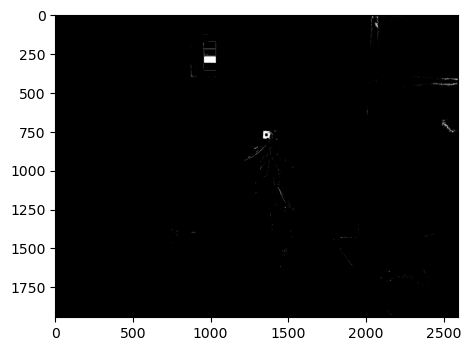

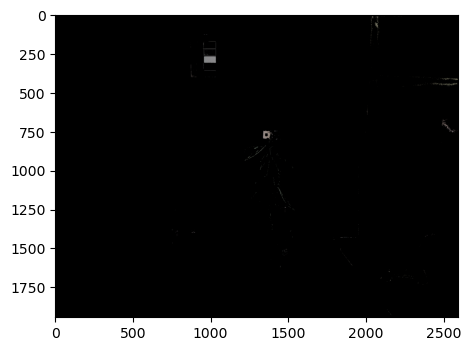

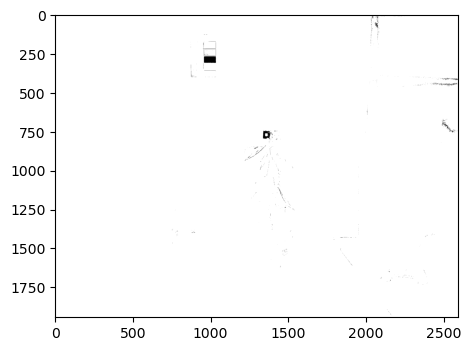

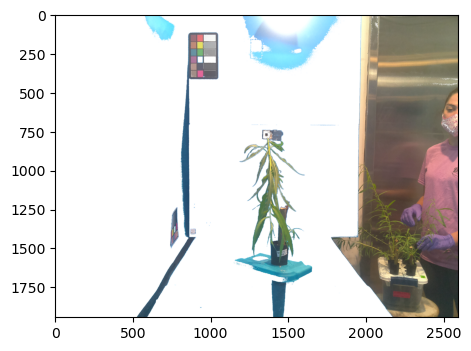

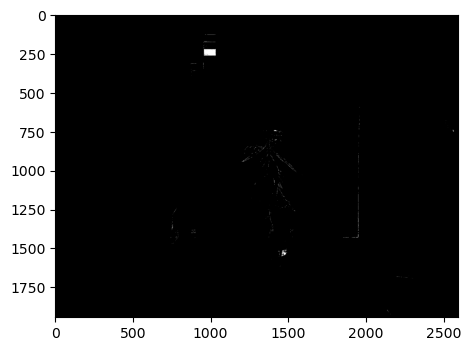

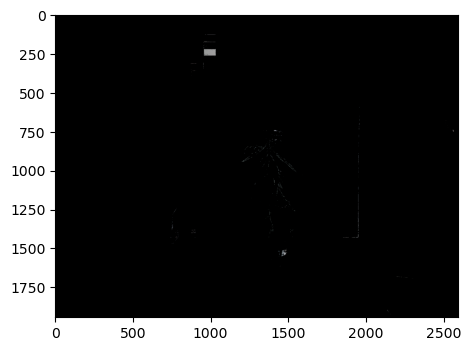

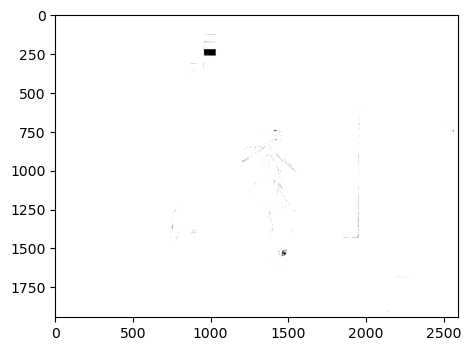

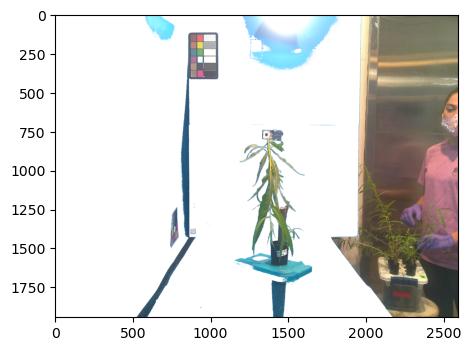

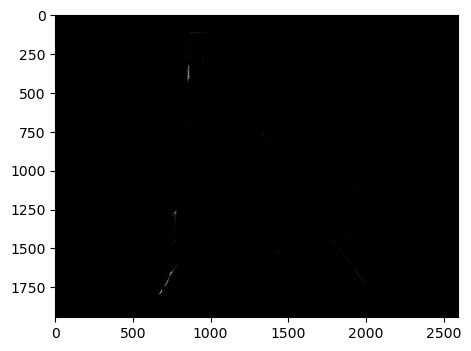

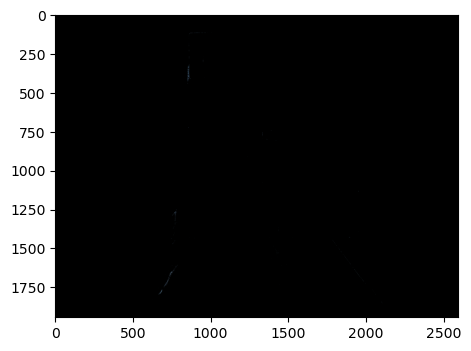

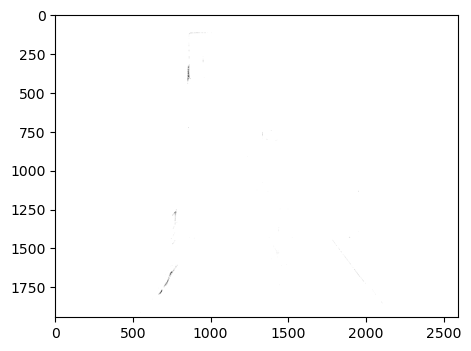

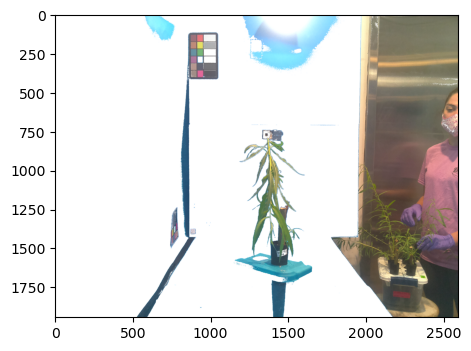

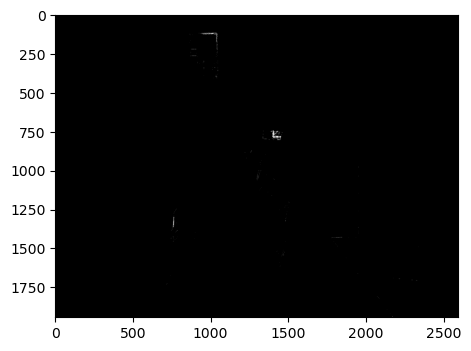

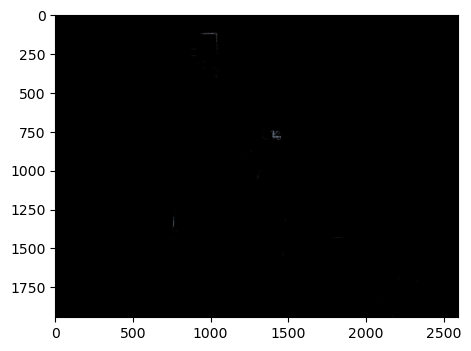

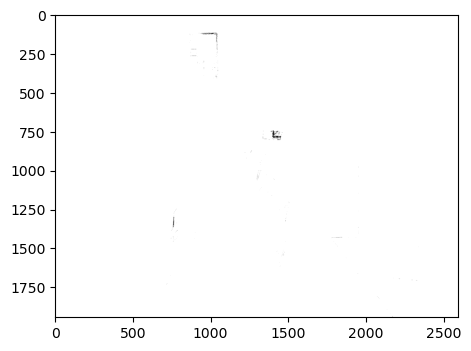

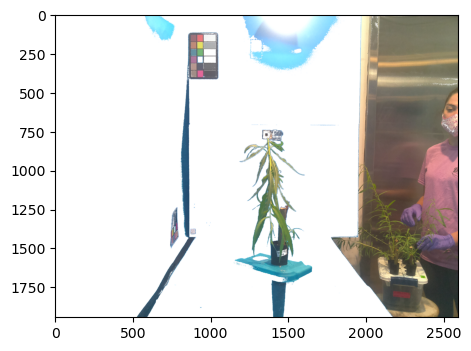

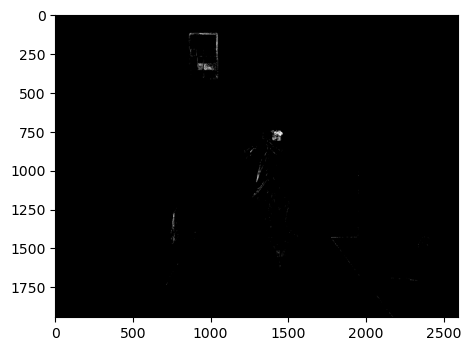

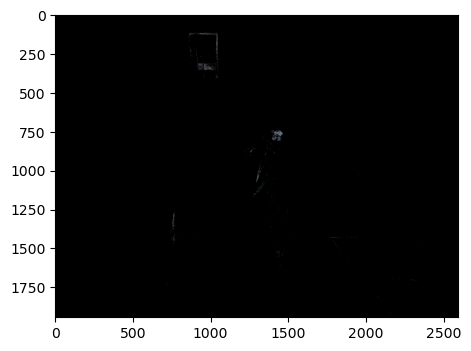

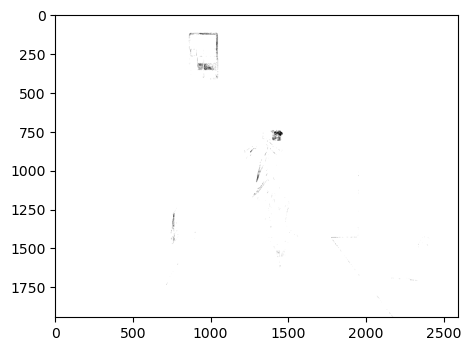

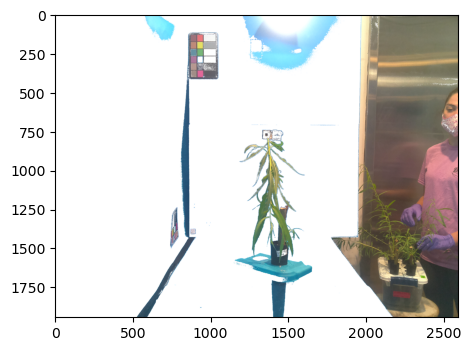

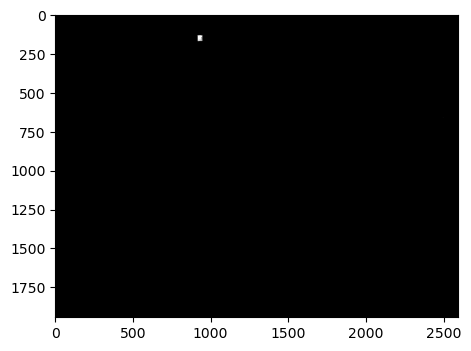

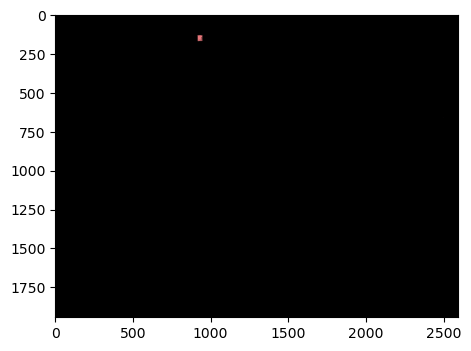

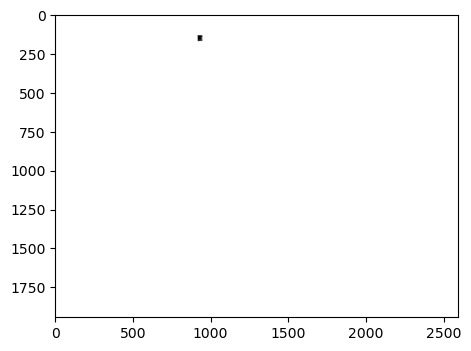

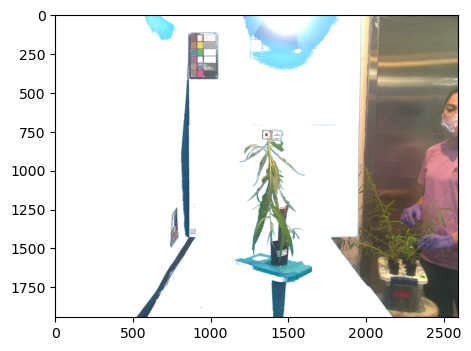

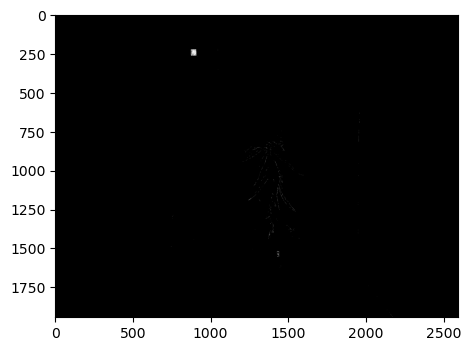

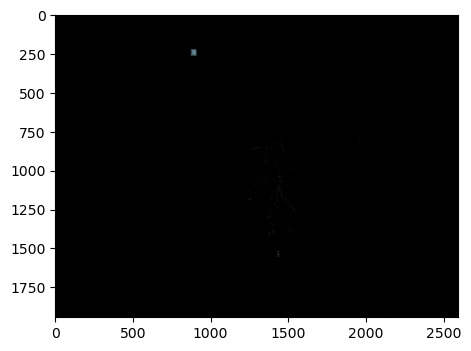

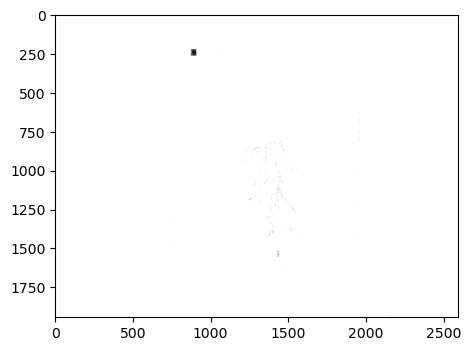

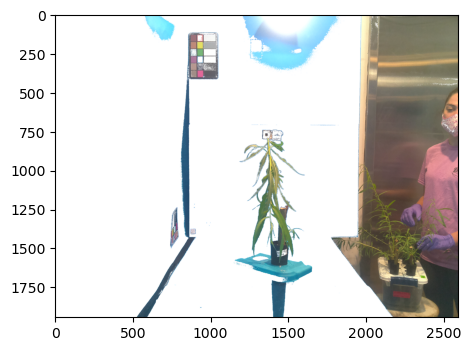

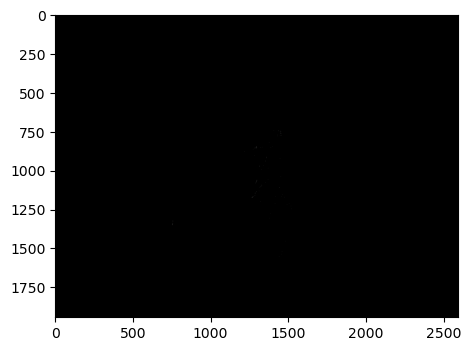

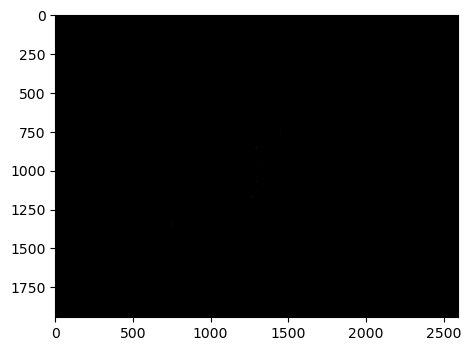

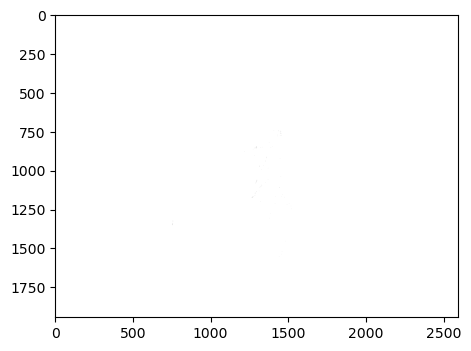

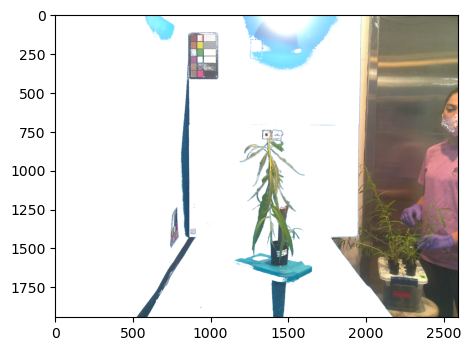

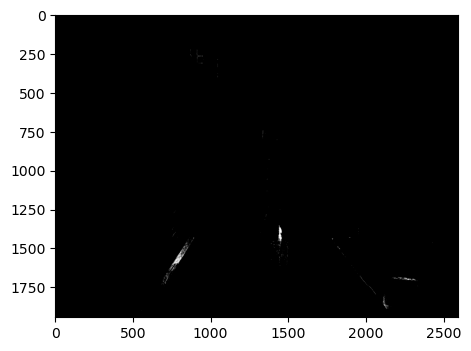

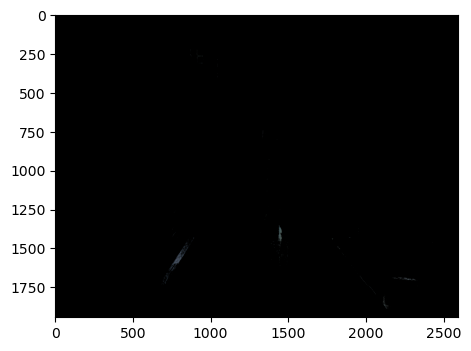

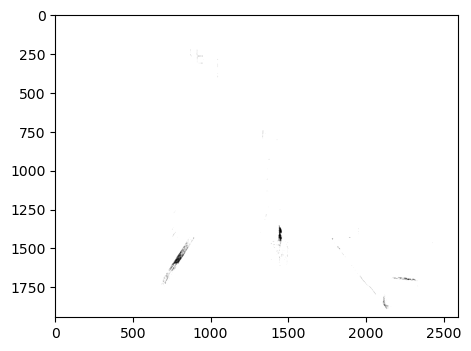

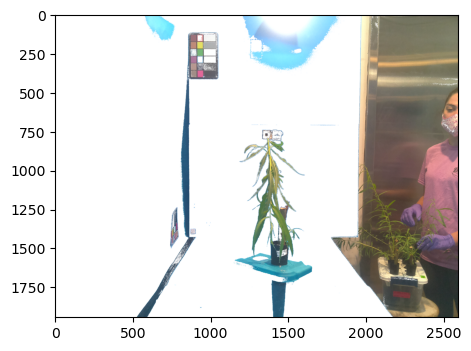

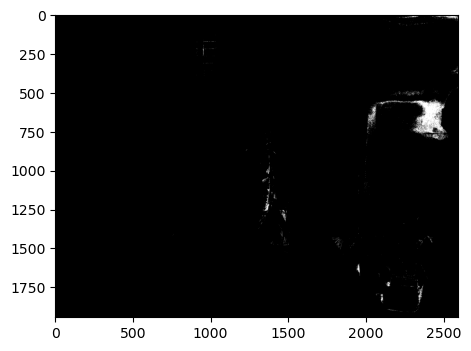

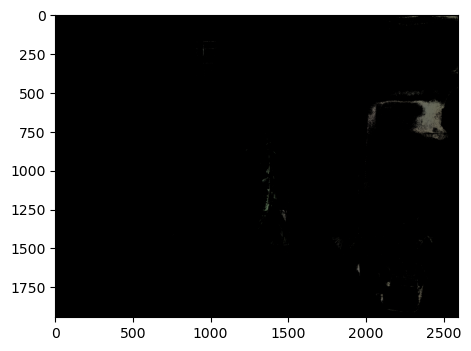

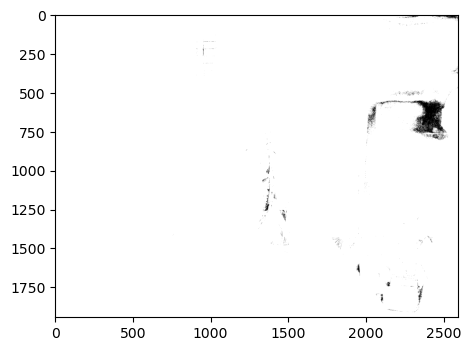

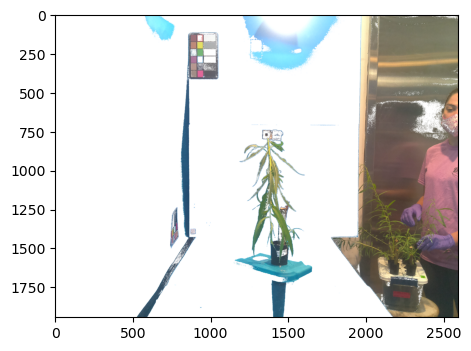

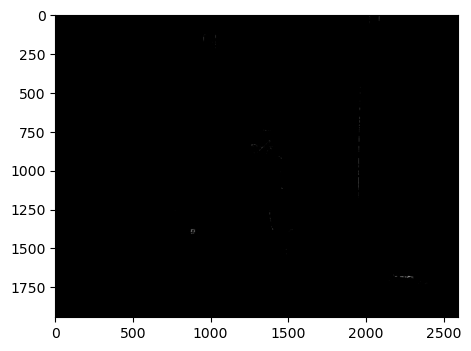

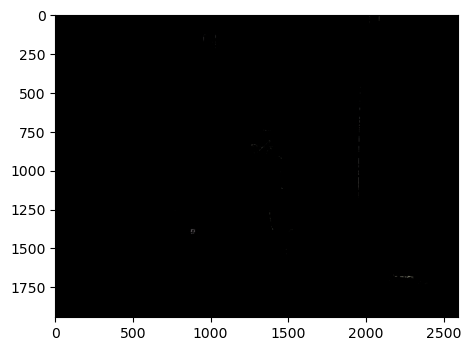

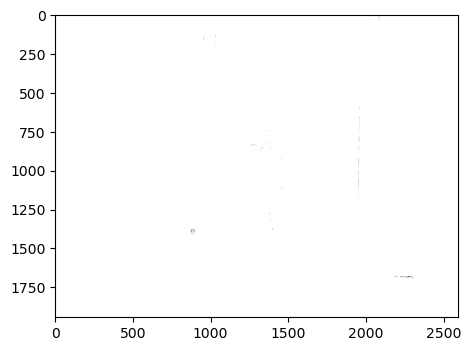

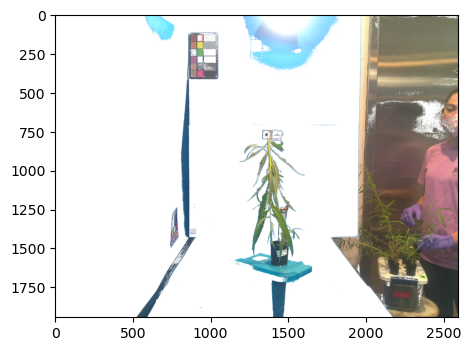

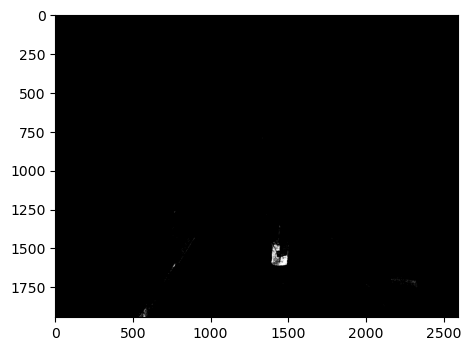

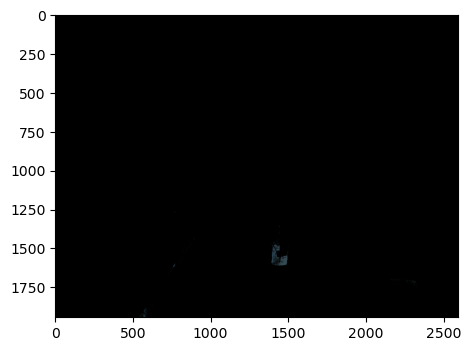

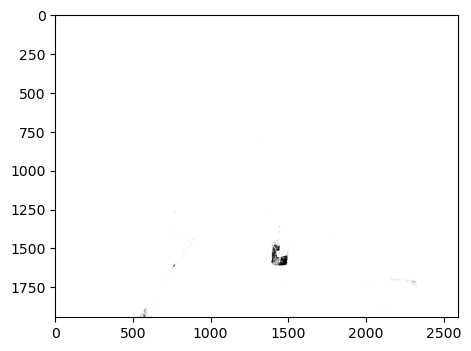

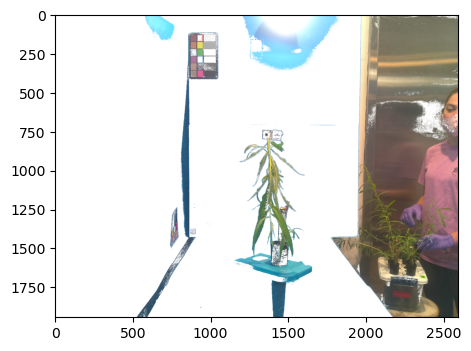

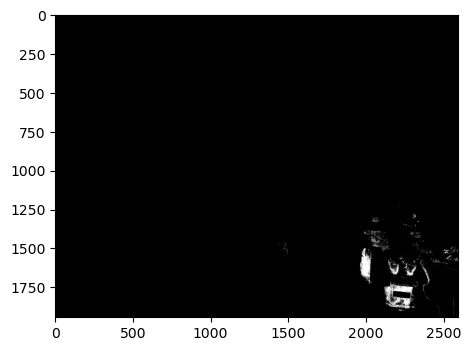

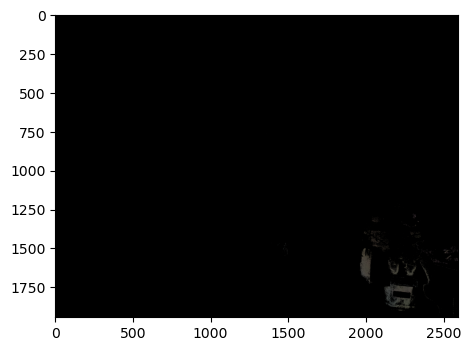

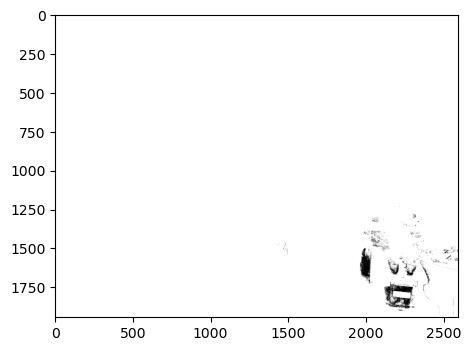

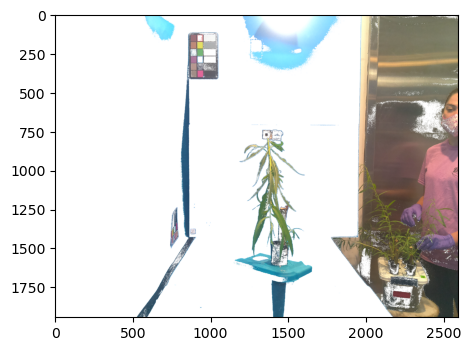

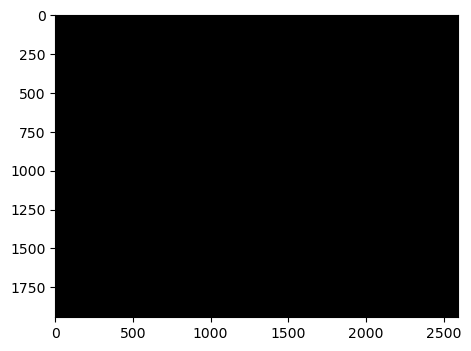

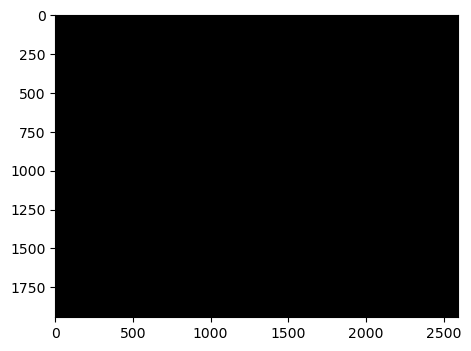

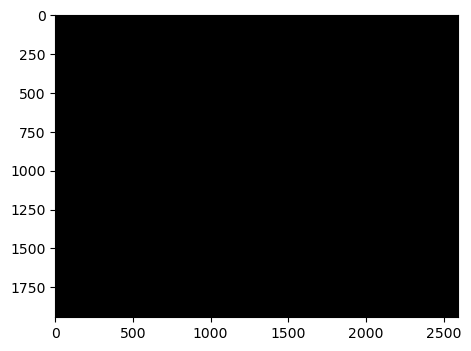

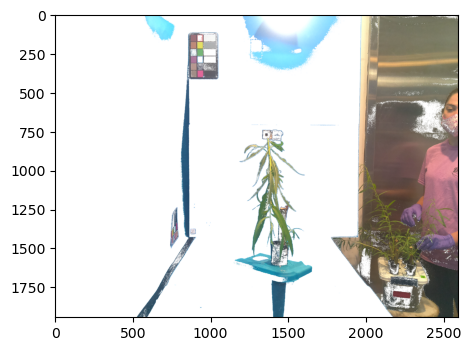

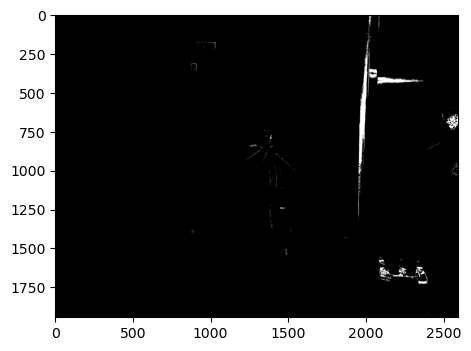

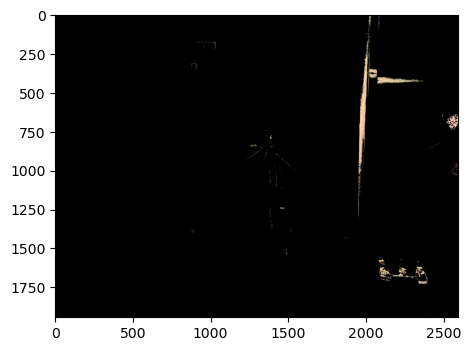

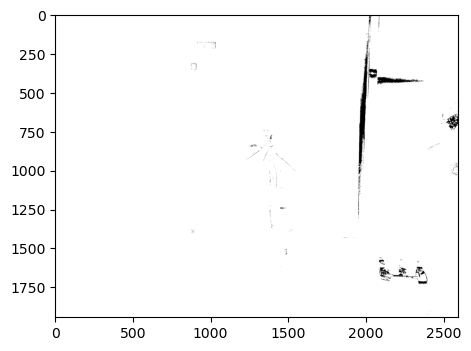

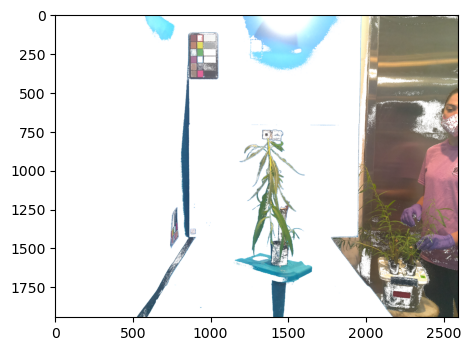

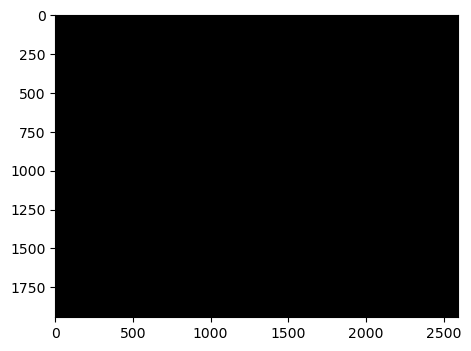

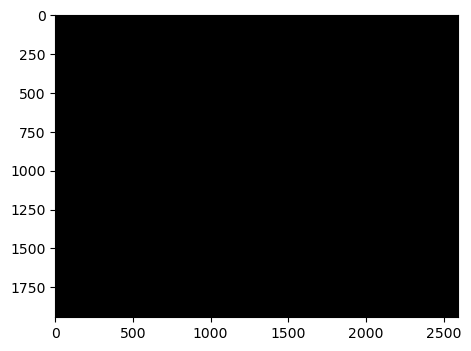

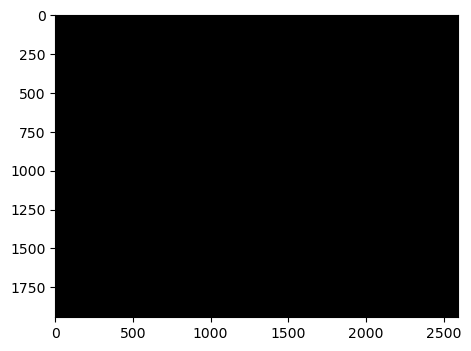

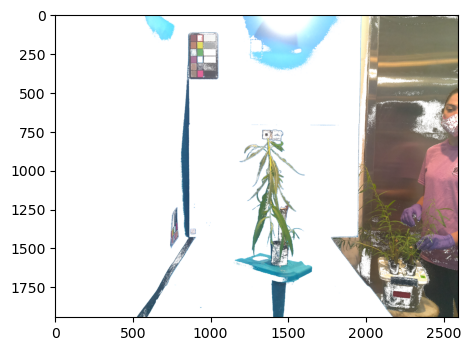

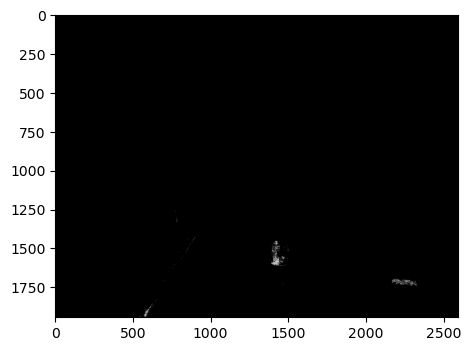

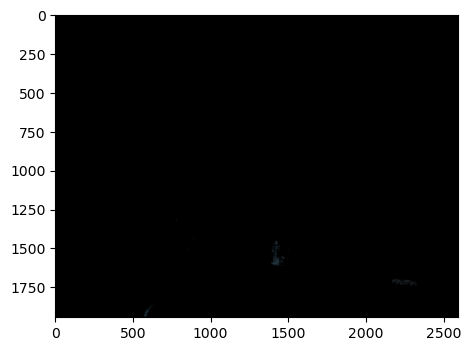

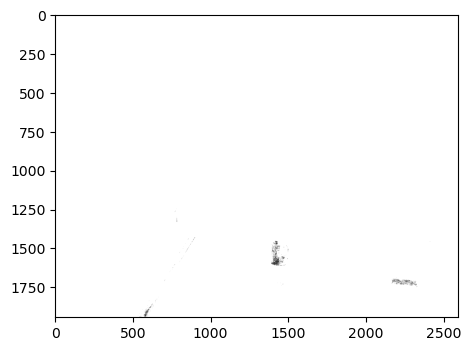

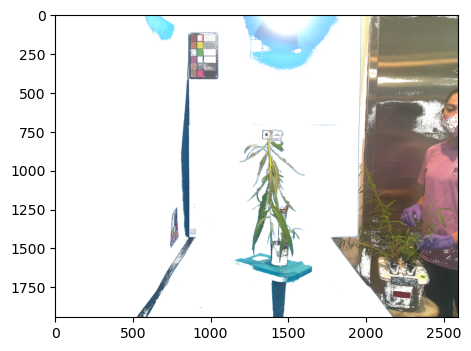

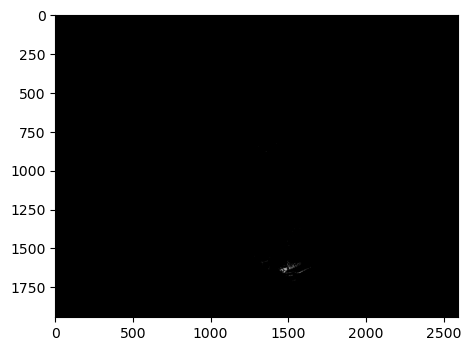

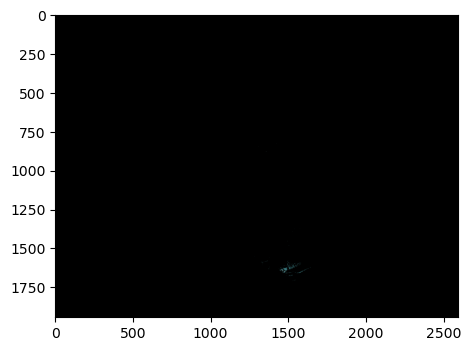

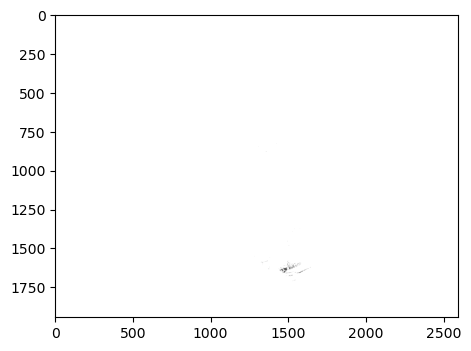

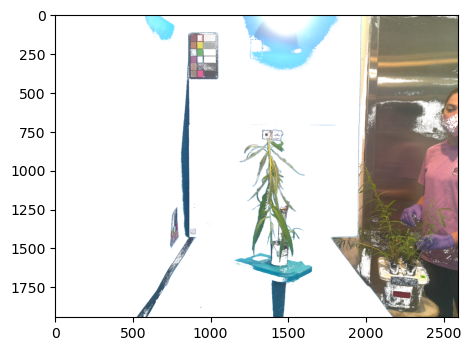

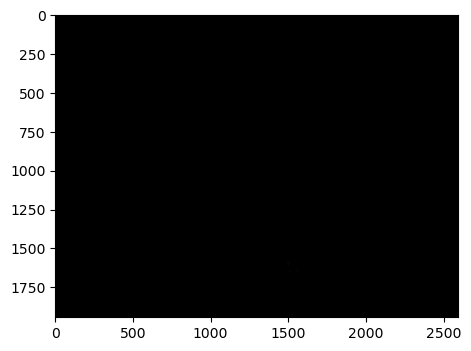

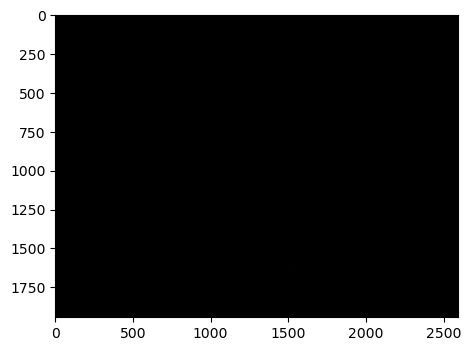

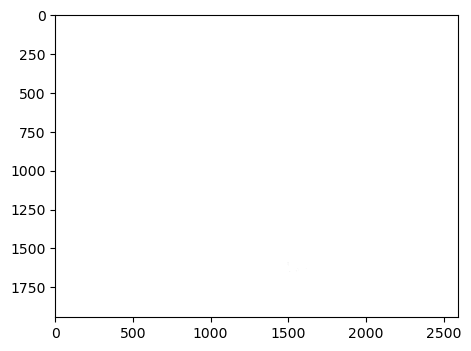

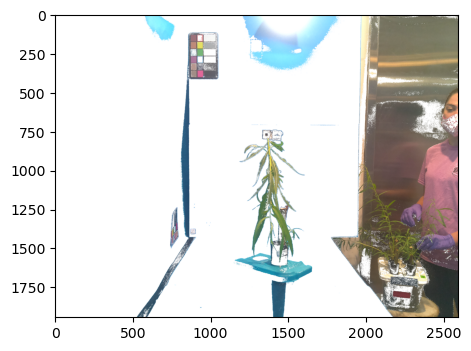

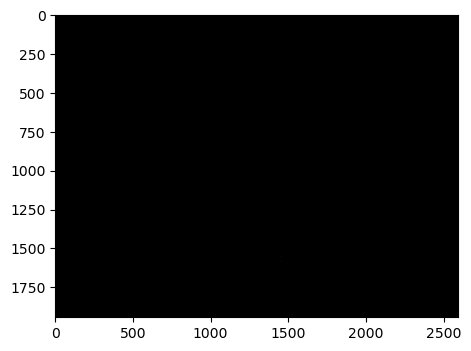

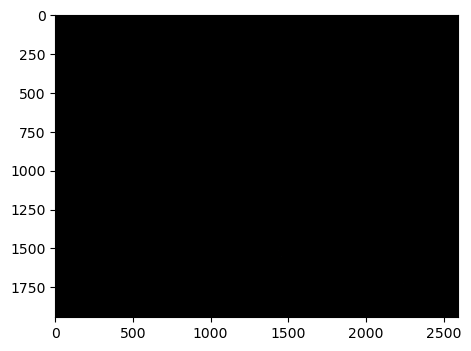

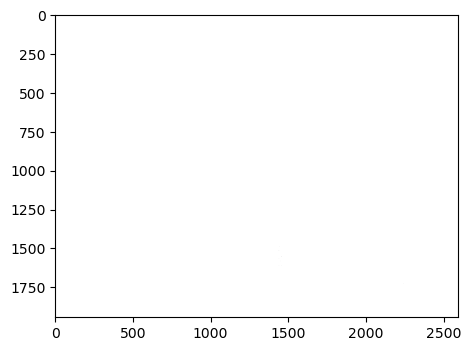

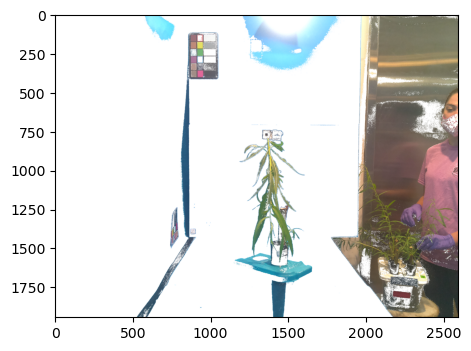

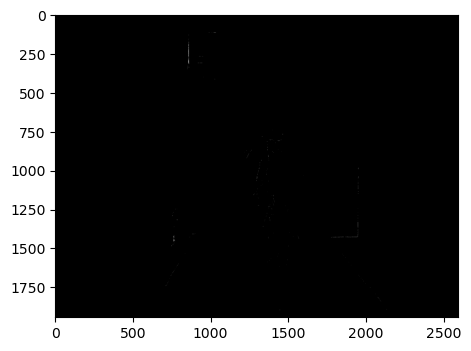

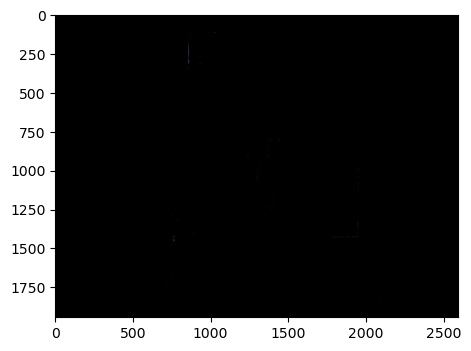

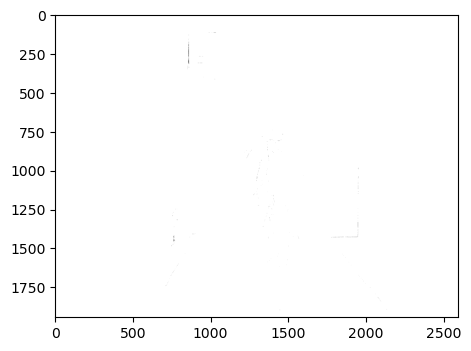

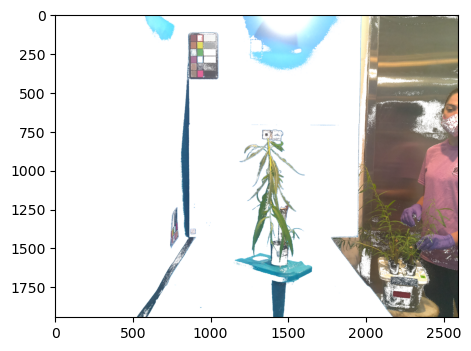

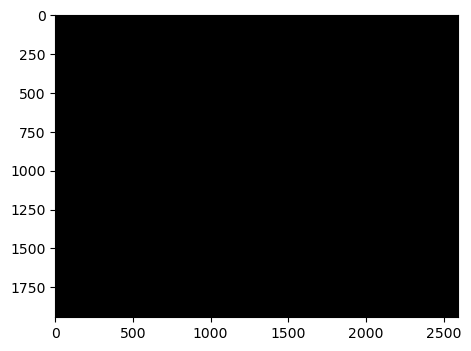

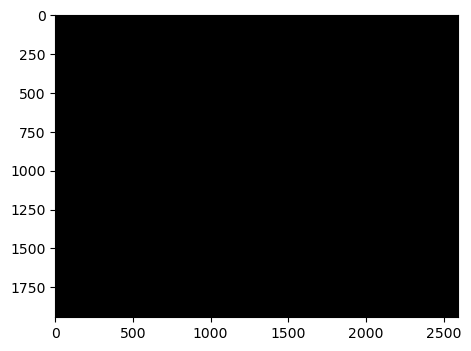

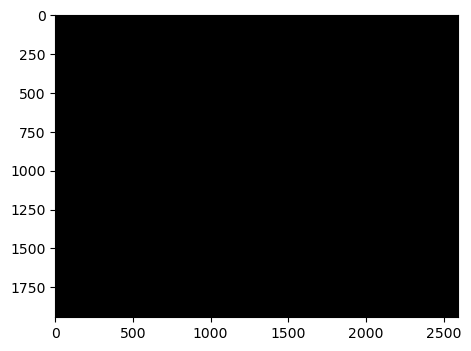

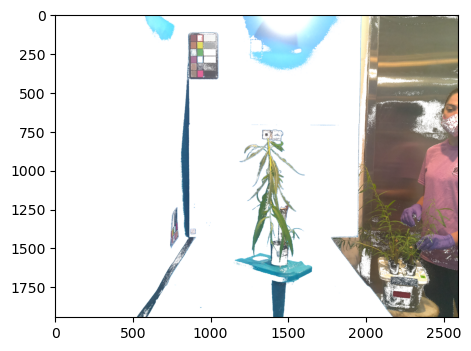

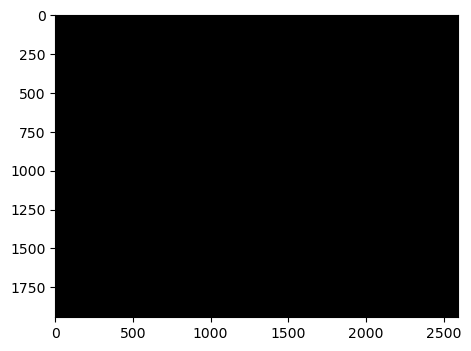

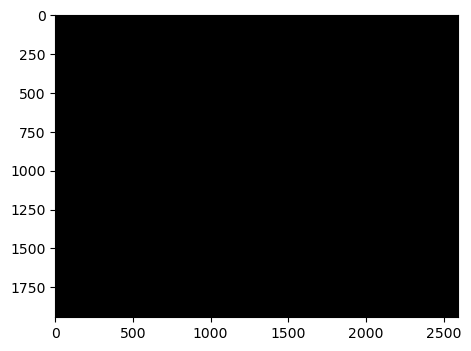

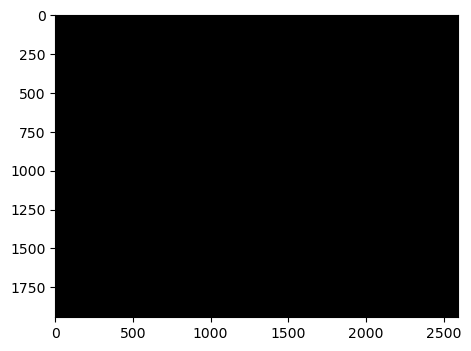

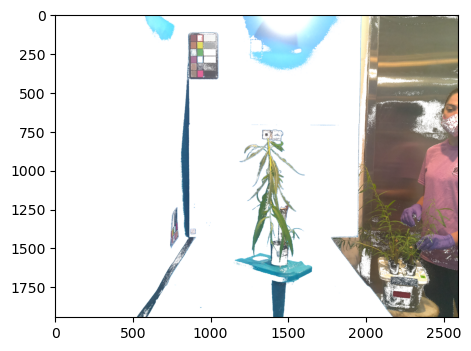

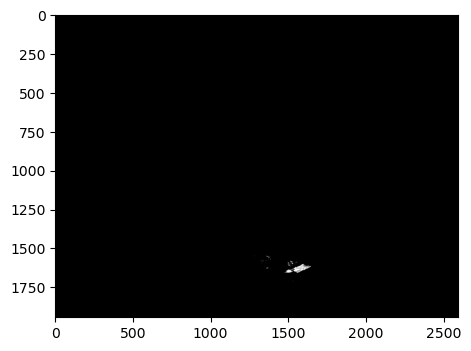

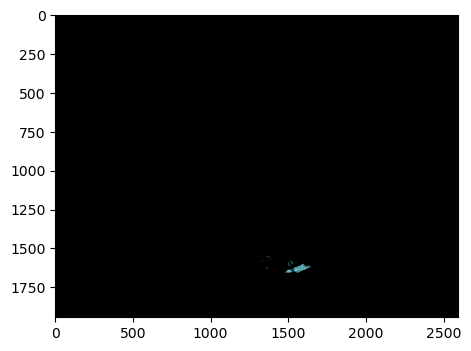

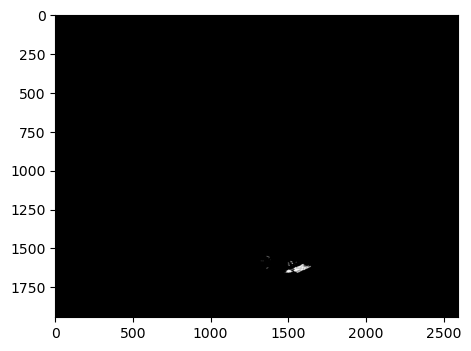

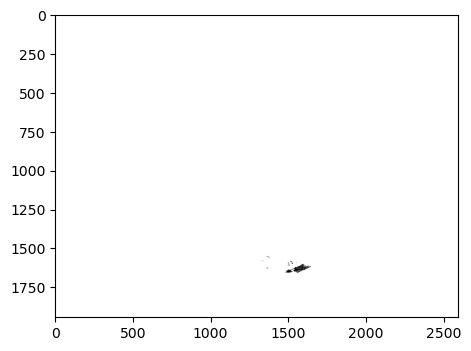

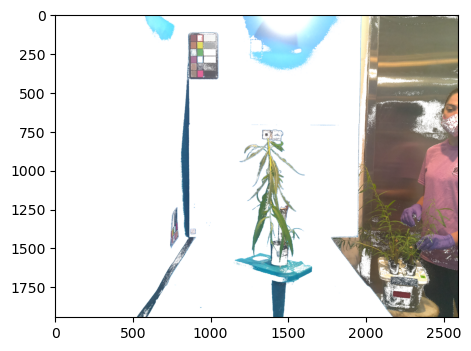

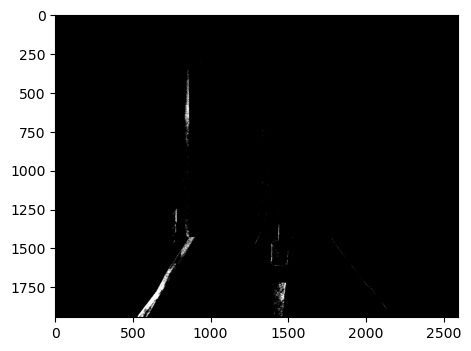

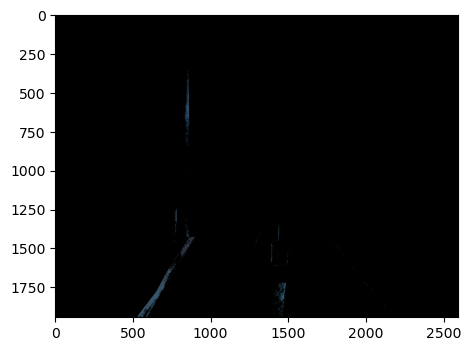

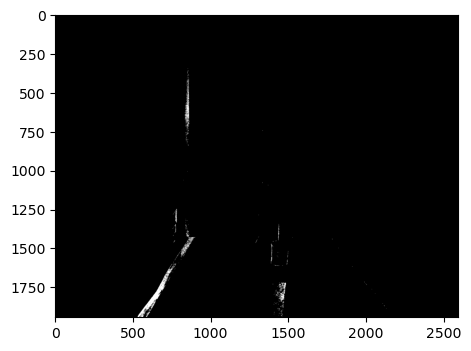

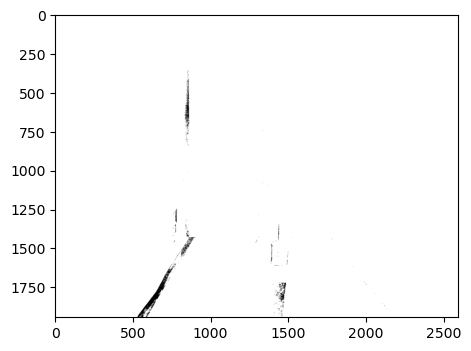

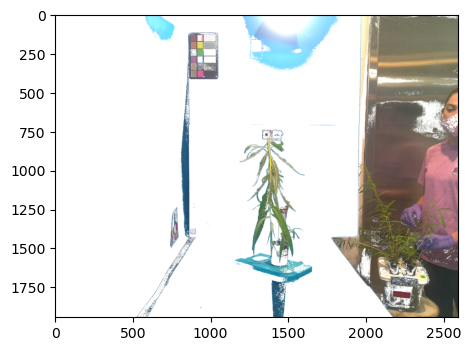

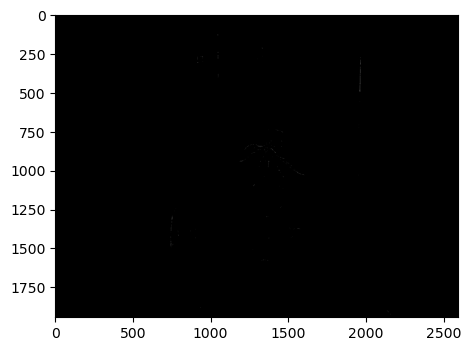

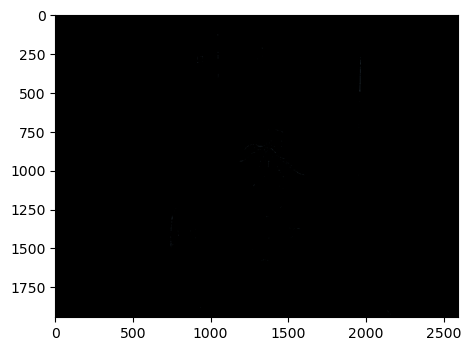

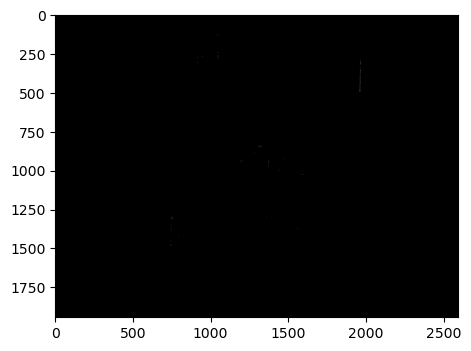

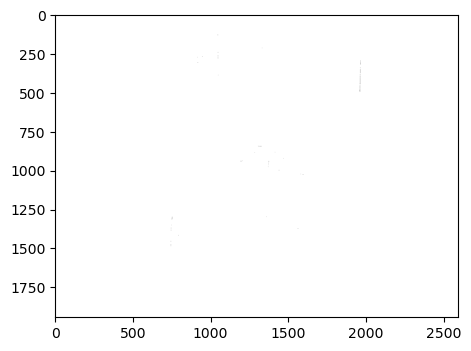

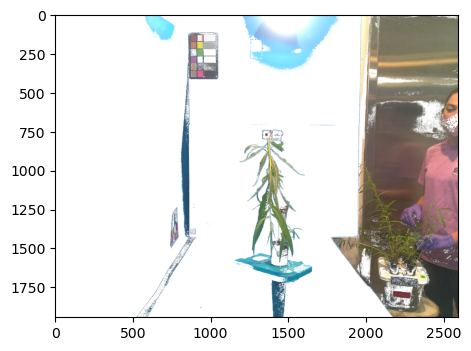

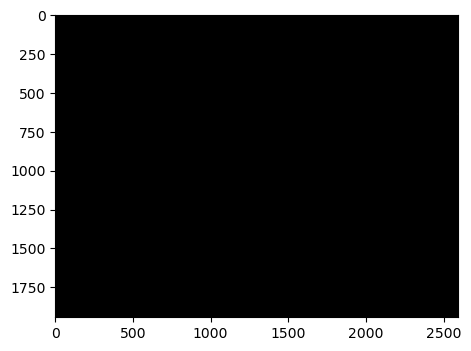

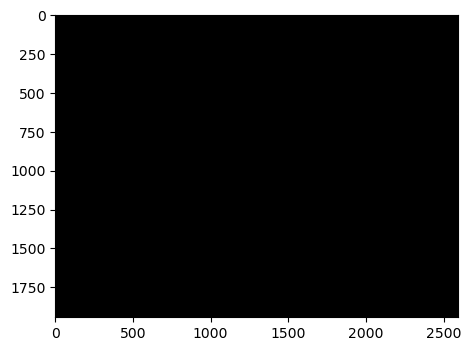

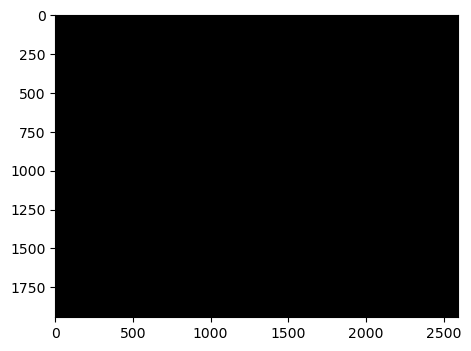

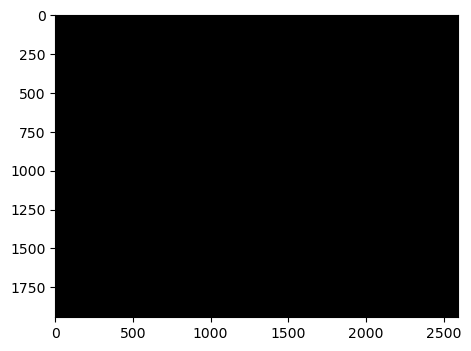

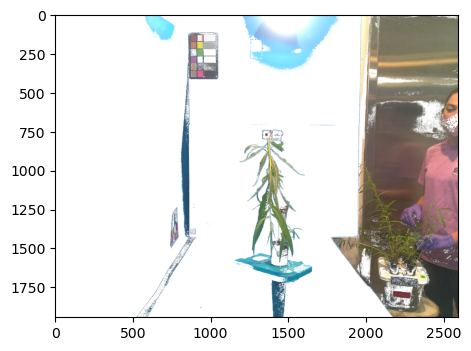

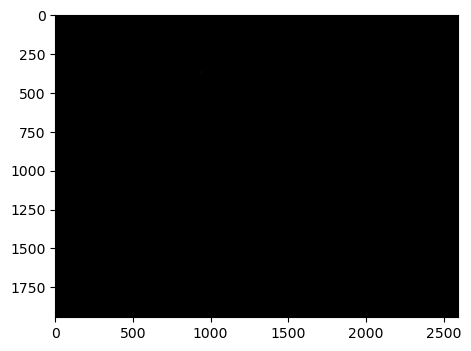

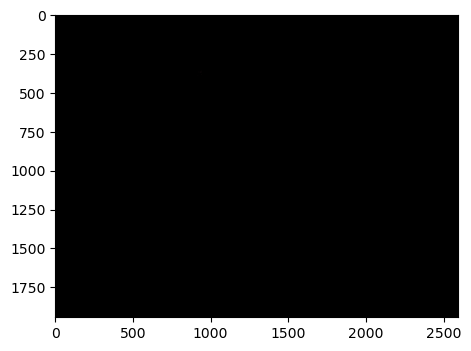

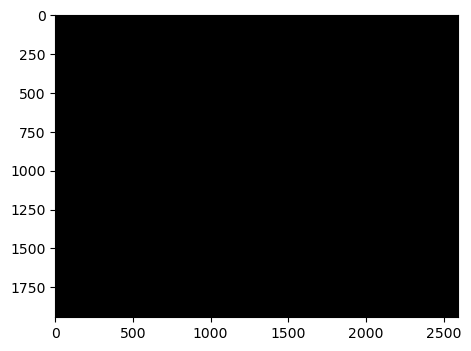

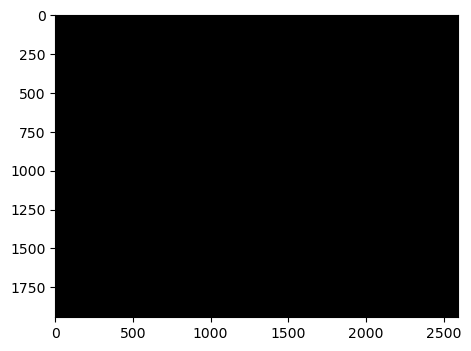

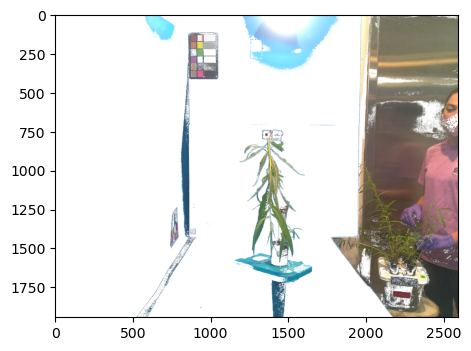

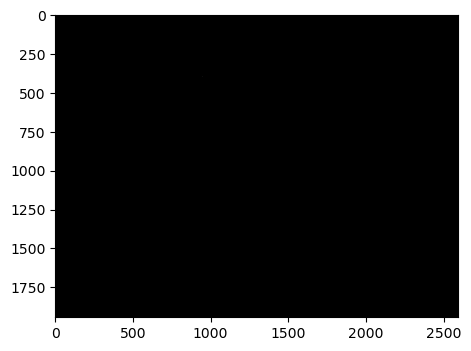

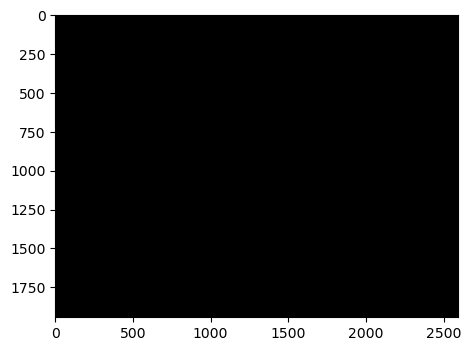

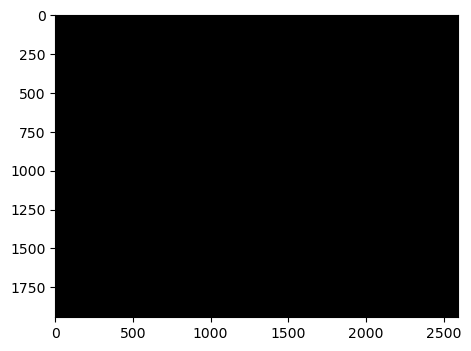

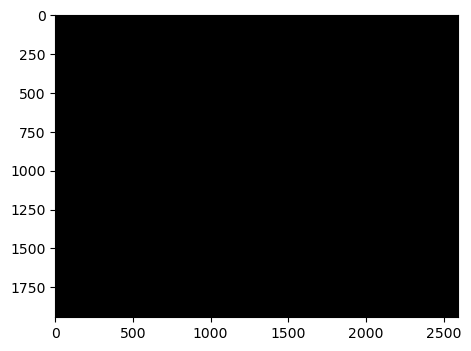

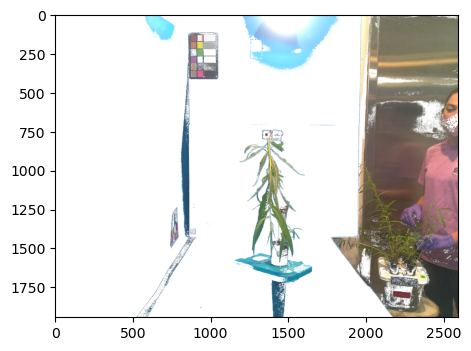

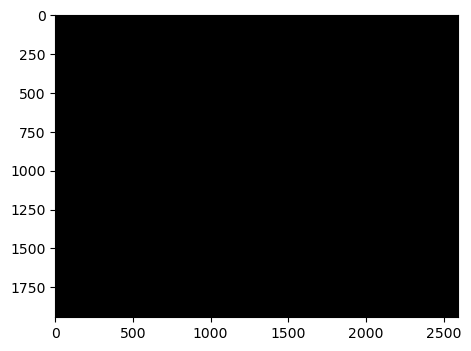

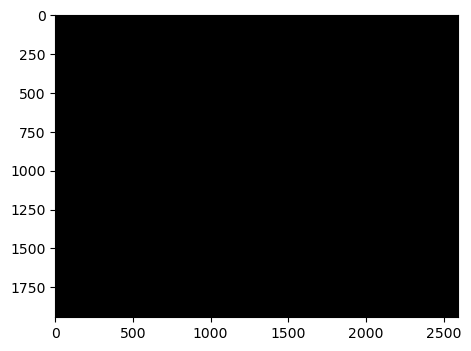

NOPE


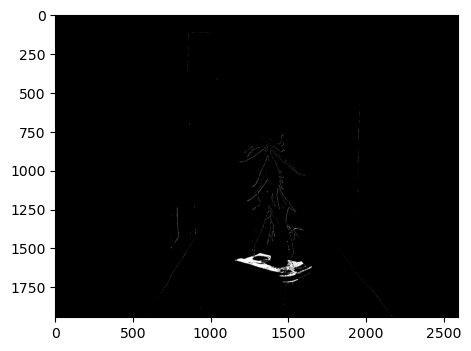

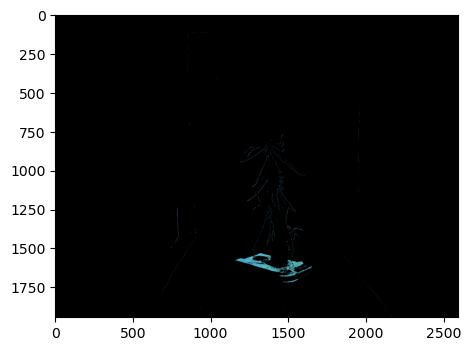

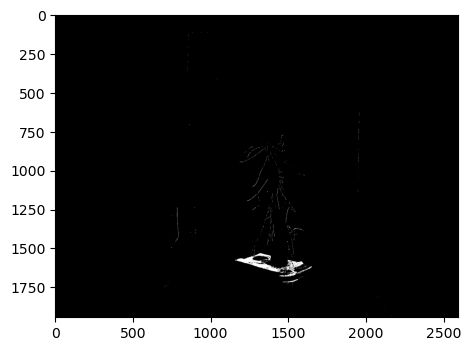

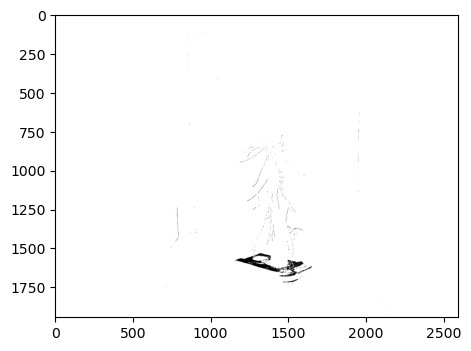

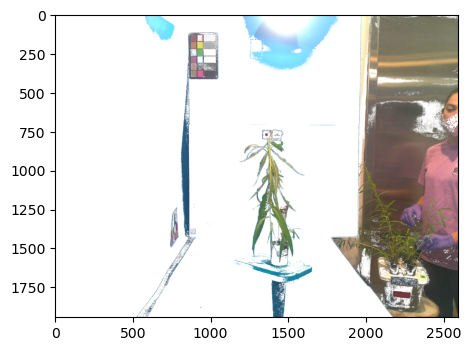

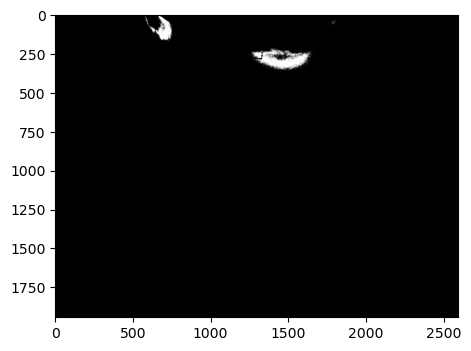

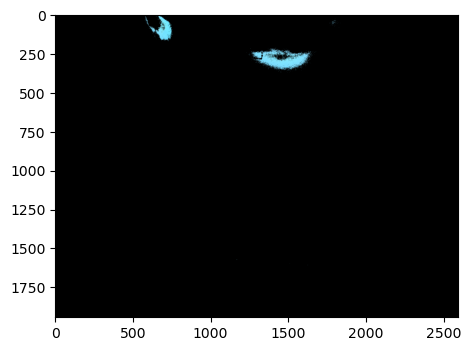

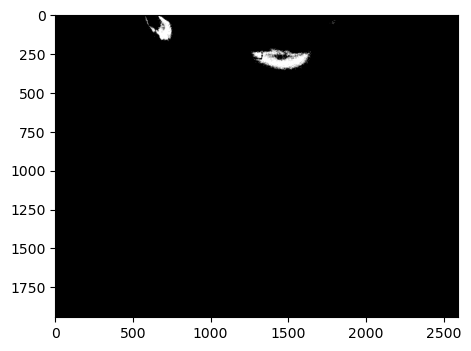

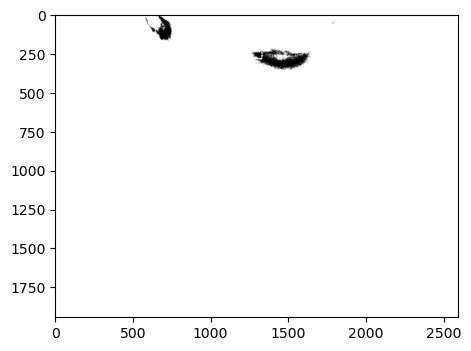

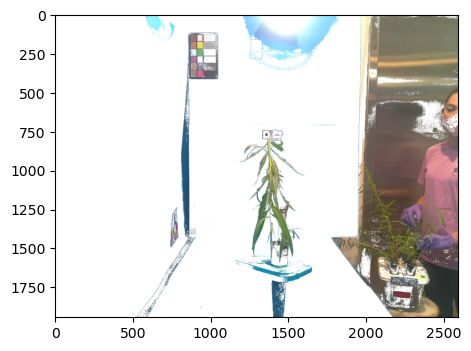

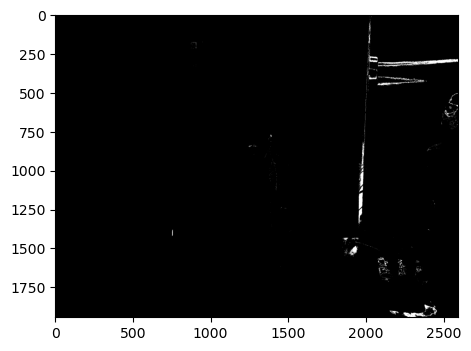

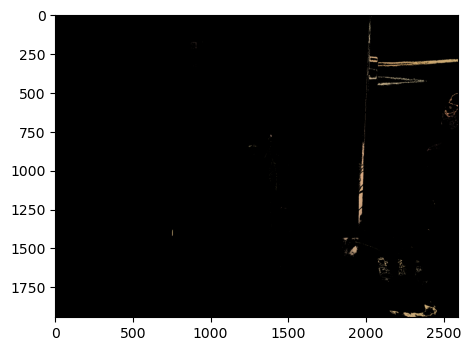

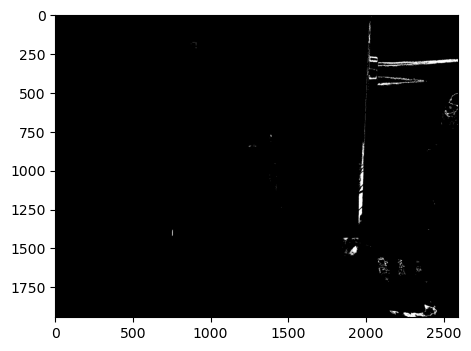

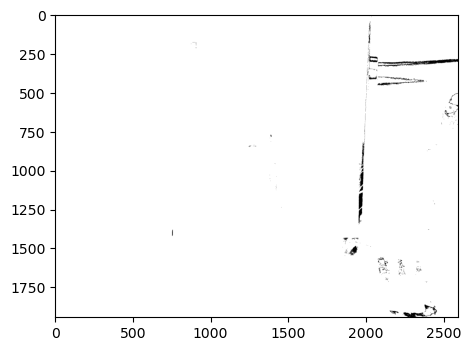

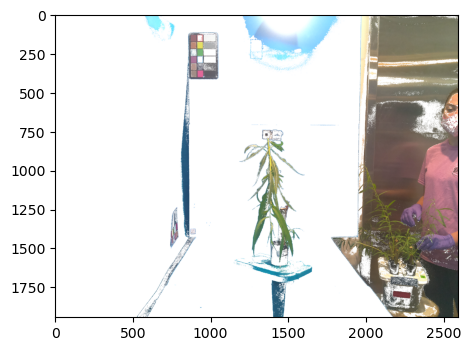

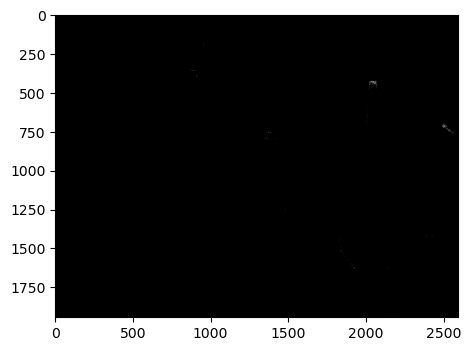

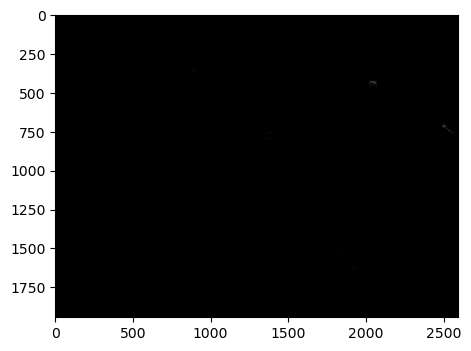

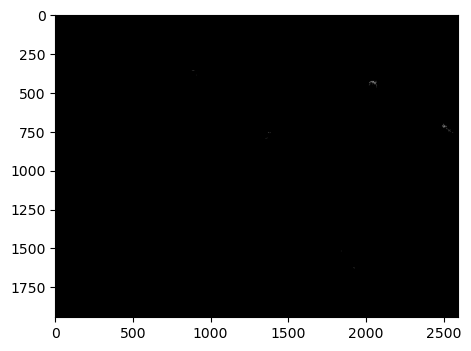

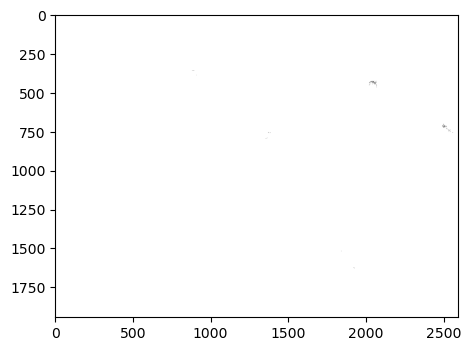

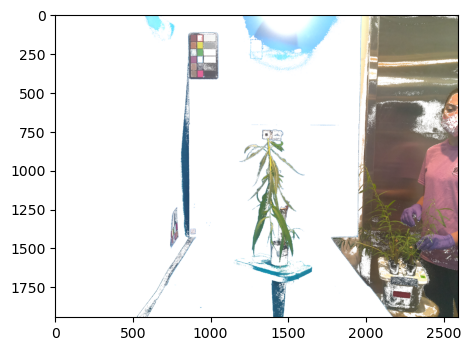

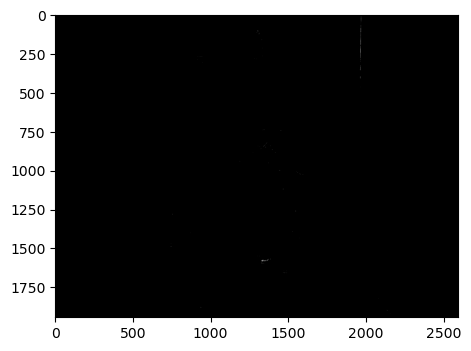

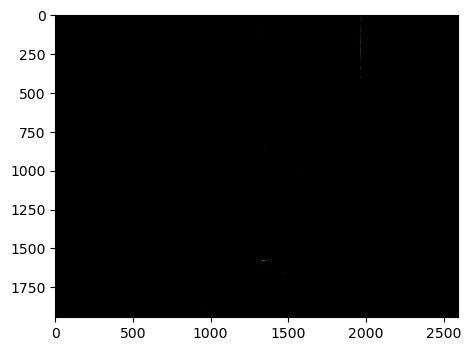

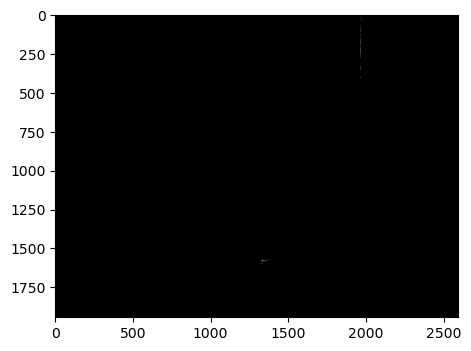

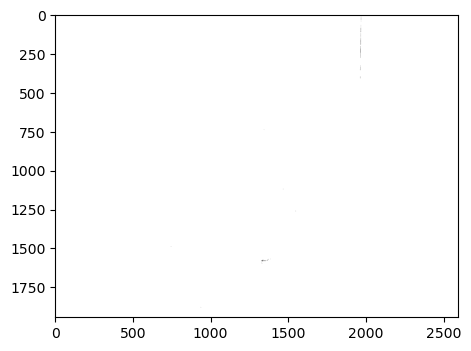

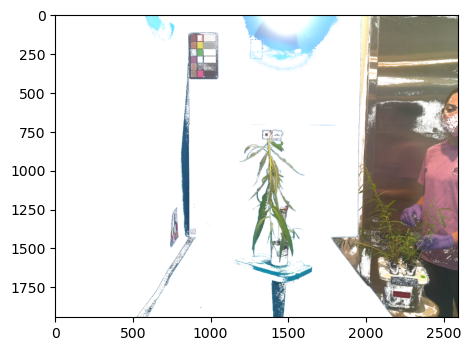

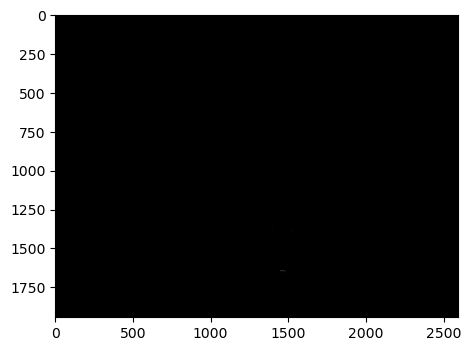

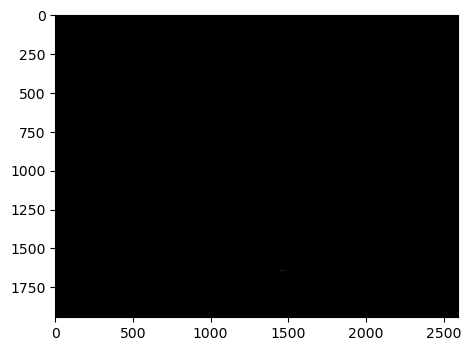

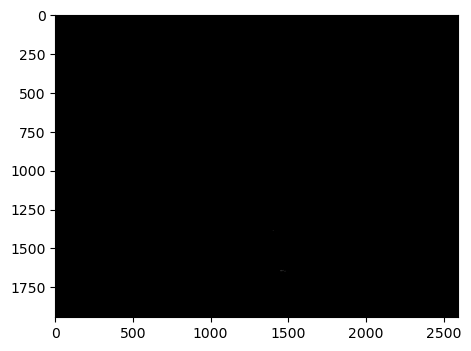

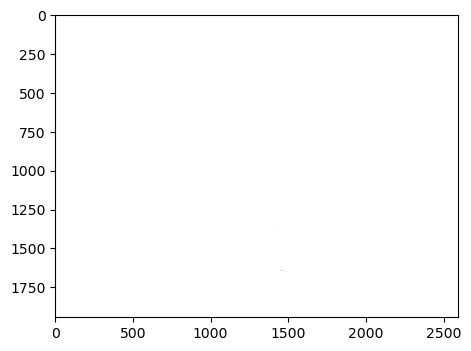

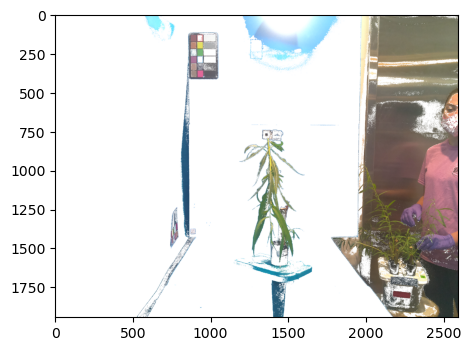

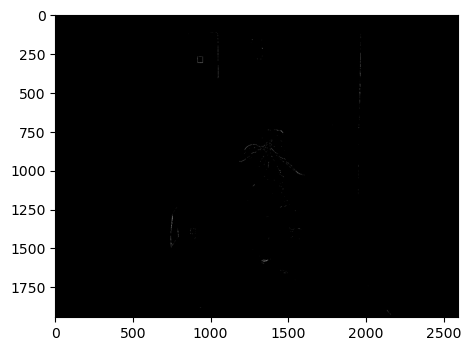

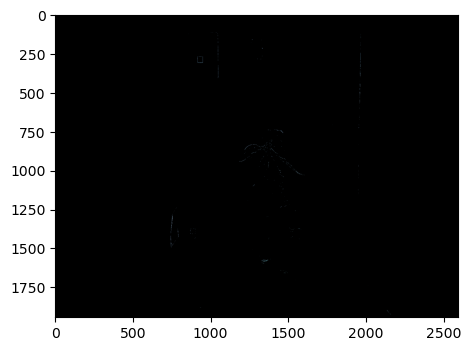

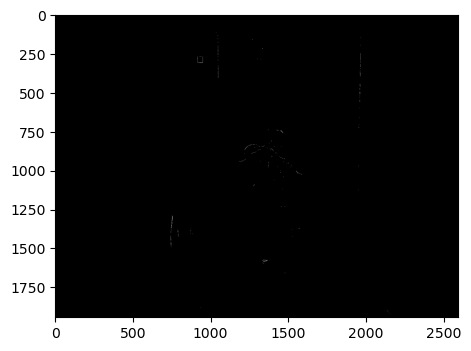

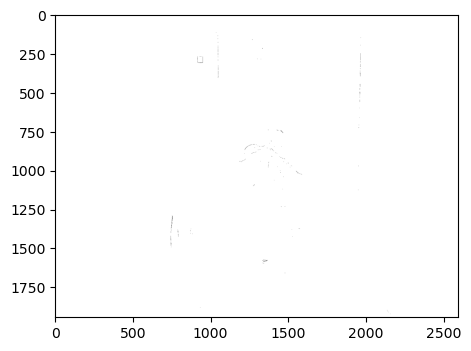

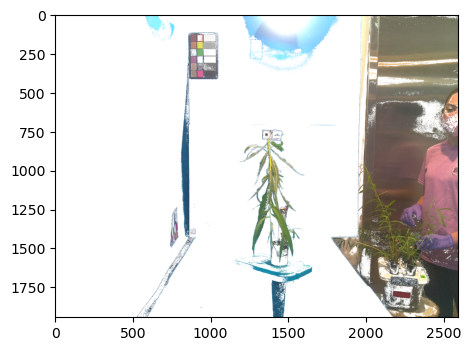

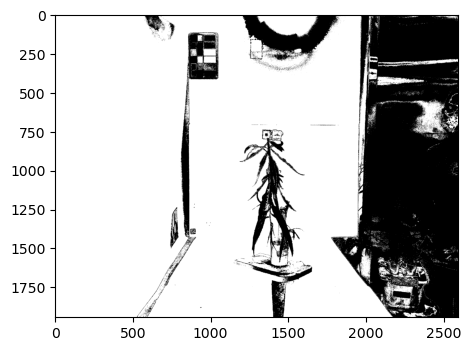

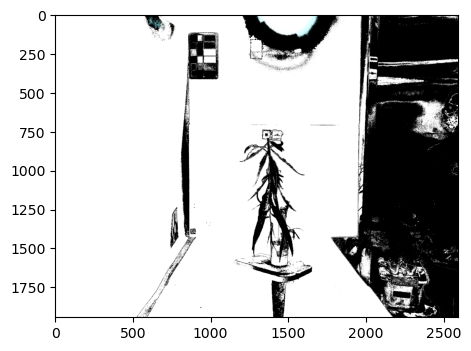

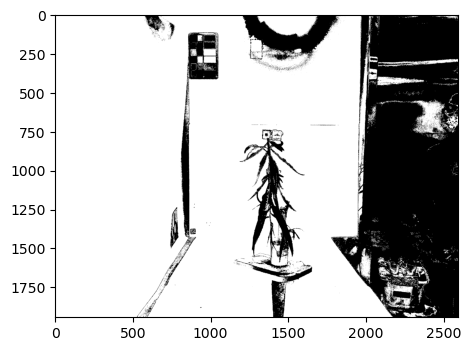

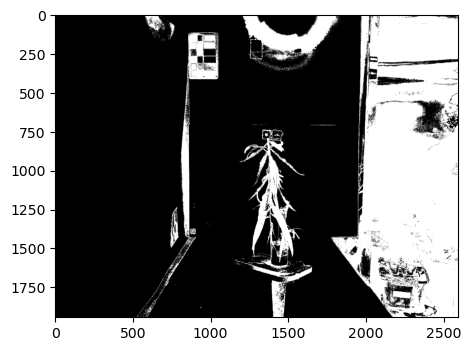

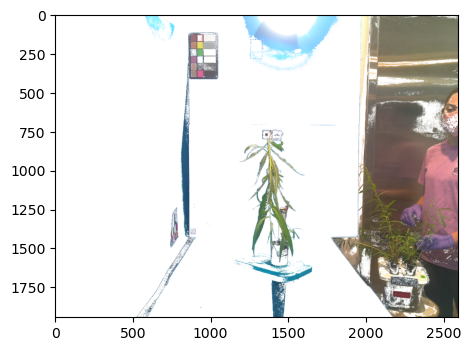

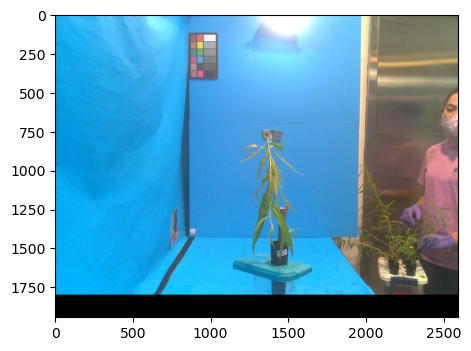

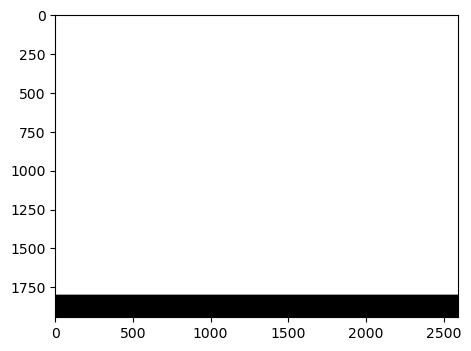

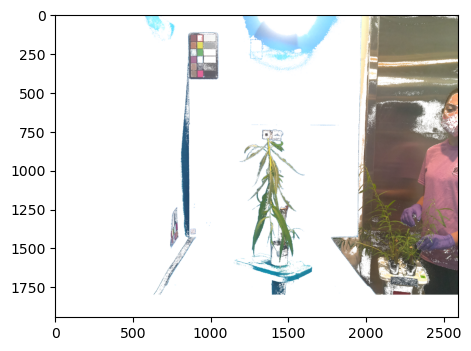

## 3.3 Adjusting "a"

Note: White balance needs to be as **low** as possible without background interferring with plant

> 1 ) Run code block below if value needs to be adjusted. \
> 2 ) Record in Google Sheet


## 3.4 Adjusting "b"

Run code block below if value needs to be adjusted. 

Record "b" value in Google Sheet.

## 3.5 Adjusting "c"

Run code block below if value needs to be adjusted. 

Record "c" value in Google Sheet.

## 3.6 Adjusting Boundary Area (ROI)

Run code block below if values for the Region of Interest (ROI) need to be adjusted. 

Record "x1, y1, x2, y2" values in Google Sheet.

# 4.0 Final Comparison